# Capstone Project  Part -1

## Problem
The company wants to develop a model through which they can do churn prediction of the accounts and provide segmented offers to the potential churners. In this company, account churn is a major thing because 1 account can have multiple customers. hence by losing one account the company might be losing more than one customer. Offering   segmented   free offers or subsidies for potential churners shouldn’t be too high thereby making a loss to the company

## Importing Library

In [1]:
import os 
os.chdir('D:\\PY\\Jupyter\\Datasets')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
from sklearn.preprocessing import LabelEncoder
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

## Sample dataset

In [3]:
df=pd.read_excel('Customer Churn Data.xlsx',sheet_name=1)
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


## Data Dictionary

In [4]:
# pd.set_option('display.width', 100)
pd.set_option('max_colwidth',125)

In [5]:
df_dict=pd.read_excel('Customer Churn Data.xlsx',sheet_name=0)
df_dict.drop('Unnamed: 0',axis=1,inplace=True)
df_dict.columns=df_dict.loc[0]
df_dict=df_dict[1:]
df_dict

,Variable,Description
1,AccountID,account unique identifier
2,Churn,account churn flag (Target)
3,Tenure,Tenure of account
4,City_Tier,Tier of primary customer's city
5,CC_Contacted_L12m,How many times all the customers of the account has contacted customer care in last 12months
6,Payment,Preferred Payment mode of the customers in the account
7,Gender,Gender of the primary customer of the account
8,Service_Score,Satisfaction score given by customers of the account on service provided by company
9,Account_user_count,Number of customers tagged with this account
10,account_segment,Account segmentation on the basis of spend


### Data Size

In [6]:
df.shape

(11260, 19)

In [7]:
print('Number of rows :',df.shape[0])
print('Number of columns :',df.shape[1])

Number of rows : 11260
Number of columns : 19


## Datatypes

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

### Duplicates

In [9]:
print('Number of duplicates :',df.duplicated().sum())

Number of duplicates : 0


### Description

In [10]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
AccountID,11260,NaN,NaN,NaN,25629.5,3250.63,20000,22814.8,25629.5,28444.2,31259
Churn,11260,NaN,NaN,NaN,0.168384,0.374223,0,0,0,0,1
Tenure,11158,38,1,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City_Tier,11148,NaN,NaN,NaN,1.65393,0.915015,1,1,1,3,3
CC_Contacted_LY,11158,NaN,NaN,NaN,17.8671,8.85327,4,11,16,23,132
Payment,11151,5,Debit Card,4587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,11152,4,Male,6328,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Service_Score,11162,NaN,NaN,NaN,2.90253,0.725584,0,2,3,3,5
Account_user_count,11148,7,4,4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN
account_segment,11163,7,Super,4062,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.describe().T[['count', 'mean','50%', 'std', 'min','max']]

,count,mean,50%,std,min,max
AccountID,11260.0,25629.500000,25629.5,3250.626350,20000.0,31259.0
Churn,11260.0,0.168384,0.0,0.374223,0.0,1.0
City_Tier,11148.0,1.653929,1.0,0.915015,1.0,3.0
CC_Contacted_LY,11158.0,17.867091,16.0,8.853269,4.0,132.0
Service_Score,11162.0,2.902526,3.0,0.725584,0.0,5.0
CC_Agent_Score,11144.0,3.066493,3.0,1.379772,1.0,5.0
Complain_ly,10903.0,0.285334,0.0,0.451594,0.0,1.0


In [12]:
dfc=df.columns

## Unique values

In [13]:
for i in dfc[1:]:
    print(i,'=',df[i].nunique())
    

Churn = 2
Tenure = 38
City_Tier = 3
CC_Contacted_LY = 44
Payment = 5
Gender = 4
Service_Score = 6
Account_user_count = 7
account_segment = 7
CC_Agent_Score = 5
Marital_Status = 3
rev_per_month = 59
Complain_ly = 2
rev_growth_yoy = 20
coupon_used_for_payment = 20
Day_Since_CC_connect = 24
cashback = 5693
Login_device = 3


## Null values

In [14]:
df.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [15]:
pd.DataFrame(round((df.isnull().sum()/df.shape[0])*100,2))


,0
AccountID,0.00
Churn,0.00
Tenure,0.91
City_Tier,0.99
CC_Contacted_LY,0.91
Payment,0.97
Gender,0.96
Service_Score,0.87
Account_user_count,0.99
account_segment,0.86


# Cleaning

### Finding unnecessary values

In [16]:
for j in dfc:
    er1=[]
    er3=[]
    er1=list(df[j].unique())
    er3=[x for x in er1  if type(x)==str ]
    print(j,'\n',er3)

AccountID 
 []
Churn 
 []
Tenure 
 ['#']
City_Tier 
 []
CC_Contacted_LY 
 []
Payment 
 ['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet']
Gender 
 ['Female', 'Male', 'F', 'M']
Service_Score 
 []
Account_user_count 
 ['@']
account_segment 
 ['Super', 'Regular Plus', 'Regular', 'HNI', 'Regular +', 'Super Plus', 'Super +']
CC_Agent_Score 
 []
Marital_Status 
 ['Single', 'Divorced', 'Married']
rev_per_month 
 ['+']
Complain_ly 
 []
rev_growth_yoy 
 ['$']
coupon_used_for_payment 
 ['#', '$', '*']
Day_Since_CC_connect 
 ['$']
cashback 
 ['$']
Login_device 
 ['Mobile', 'Computer', '&&&&']


In [17]:
df1=df.copy()


## Categorical

### Churn

In [18]:
cat_dict={}
k=1
cat_dict[k]=dfc[k]
df1[dfc[k]]=pd.Categorical(df1[dfc[k]])
df1[dfc[k]].value_counts()

0    9364
1    1896
Name: Churn, dtype: int64

### City_Tier 

In [19]:
k=3
cat_dict[k]=dfc[k]
df1[dfc[k]]=pd.Categorical(df1[dfc[k]])
df1[dfc[k]].value_counts()

1.0    7263
3.0    3405
2.0     480
Name: City_Tier, dtype: int64

### Payment

In [20]:
k=5
cat_dict[k]=dfc[k]
df1[dfc[k]]=pd.Categorical(df1[dfc[k]])
df1[dfc[k]].value_counts()


Debit Card          4587
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64

### Gender

In [21]:
k=6
cat_dict[k]=dfc[k]
df1[dfc[k]]=df1[dfc[k]].replace('Male','M')
df1[dfc[k]]=df1[dfc[k]].replace('Female','F')
df1[dfc[k]]=pd.Categorical(df1[dfc[k]])
df1[dfc[k]].value_counts()

M    6704
F    4448
Name: Gender, dtype: int64

### Service_Score

In [22]:
k=7
cat_dict[k]=dfc[k]
df1[dfc[k]]=pd.Categorical(df1[dfc[k]])
df1[dfc[k]].value_counts()

3.0    5490
2.0    3251
4.0    2331
1.0      77
0.0       8
5.0       5
Name: Service_Score, dtype: int64

### account_segment

In [23]:
k=9
cat_dict[k]=dfc[k]
df1[dfc[k]]=df1[dfc[k]].replace('Regular +','Regular Plus')
df1[dfc[k]]=df1[dfc[k]].replace('Super +','Super Plus')
df1[dfc[k]]=pd.Categorical(df1[dfc[k]])
df1[dfc[k]].value_counts()

Regular Plus    4124
Super           4062
HNI             1639
Super Plus       818
Regular          520
Name: account_segment, dtype: int64

### CC_Agent_Score

In [24]:
k=10
cat_dict[k]=dfc[k]
df1[dfc[k]]=pd.Categorical(df1[dfc[k]])
df1[dfc[k]].value_counts()

3.0    3360
1.0    2302
5.0    2191
4.0    2127
2.0    1164
Name: CC_Agent_Score, dtype: int64

### Marital status

In [25]:
k=11
cat_dict[k]=dfc[k]
df1[dfc[k]]=pd.Categorical(df1[dfc[k]])
df1[dfc[k]].value_counts()

Married     5860
Single      3520
Divorced    1668
Name: Marital_Status, dtype: int64

### Complain_ly 

In [26]:
k=13
cat_dict[k]=dfc[k]
df1[dfc[k]]=pd.Categorical(df1[dfc[k]])
df1[dfc[k]].value_counts()

0.0    7792
1.0    3111
Name: Complain_ly, dtype: int64

### 'Login_device'

In [27]:
k=18
cat_dict[k]=dfc[k]
df1[dfc[k]]=df1[dfc[k]].replace('&&&&',np.nan)
df1[dfc[k]]=pd.Categorical(df1[dfc[k]])
df1[dfc[k]].value_counts()

Mobile      7482
Computer    3018
Name: Login_device, dtype: int64

In [28]:
cat_dict

{1: 'Churn',
 3: 'City_Tier',
 5: 'Payment',
 6: 'Gender',
 7: 'Service_Score',
 9: 'account_segment',
 10: 'CC_Agent_Score',
 11: 'Marital_Status',
 13: 'Complain_ly',
 18: 'Login_device'}

## Numerical

In [29]:
for j in dfc:
    er1=[]
    er3=[]
    er1=list(df1[j].unique())
    er3=[x for x in er1  if type(x)==str ]
    print(j,'\n',er3)

AccountID 
 []
Churn 
 []
Tenure 
 ['#']
City_Tier 
 []
CC_Contacted_LY 
 []
Payment 
 ['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet']
Gender 
 ['F', 'M']
Service_Score 
 []
Account_user_count 
 ['@']
account_segment 
 ['Super', 'Regular Plus', 'Regular', 'HNI', 'Super Plus']
CC_Agent_Score 
 []
Marital_Status 
 ['Single', 'Divorced', 'Married']
rev_per_month 
 ['+']
Complain_ly 
 []
rev_growth_yoy 
 ['$']
coupon_used_for_payment 
 ['#', '$', '*']
Day_Since_CC_connect 
 ['$']
cashback 
 ['$']
Login_device 
 ['Mobile', 'Computer']


### Tenure

In [30]:
df1[dfc[2]]=df1[dfc[2]].replace('#',np.nan)
# df1[dfc[2]].value_counts()

### Account_user_count 

In [31]:
df1[dfc[8]]=df1[dfc[8]].replace('@',np.nan)
# df1[dfc[8]].value_counts()

### rev_per_month

In [32]:
df1[dfc[12]]=df1[dfc[12]].replace('+',np.nan)
# df1[dfc[12]].value_counts()

### rev_growth_yoy

In [33]:
df1[dfc[14]]=df1[dfc[14]].replace('$',np.nan)
# df1[dfc[14]].value_counts()

### coupon_used_for_payment

In [34]:
df1[dfc[15]]=df1[dfc[15]].replace('#',np.nan)
df1[dfc[15]]=df1[dfc[15]].replace('$',np.nan)
df1[dfc[15]]=df1[dfc[15]].replace('*',np.nan)
# df1[dfc[15]].value_counts()

### Day_Since_CC_connect

In [35]:
df1[dfc[16]]=df1[dfc[16]].replace('$',np.nan)
# df1[dfc[16]].value_counts()

### cashback

In [36]:
df1[dfc[17]]=df1[dfc[17]].replace('$',np.nan)
# df1[dfc[17]].value_counts()

### After cleaning up unwanted variables

In [37]:
for j in dfc:
    er1=[]
    er3=[]
    er1=list(df1[j].unique())
    er3=[x for x in er1  if type(x)==str ]
    print(j,'\n',er3)

AccountID 
 []
Churn 
 []
Tenure 
 []
City_Tier 
 []
CC_Contacted_LY 
 []
Payment 
 ['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet']
Gender 
 ['F', 'M']
Service_Score 
 []
Account_user_count 
 []
account_segment 
 ['Super', 'Regular Plus', 'Regular', 'HNI', 'Super Plus']
CC_Agent_Score 
 []
Marital_Status 
 ['Single', 'Divorced', 'Married']
rev_per_month 
 []
Complain_ly 
 []
rev_growth_yoy 
 []
coupon_used_for_payment 
 []
Day_Since_CC_connect 
 []
cashback 
 []
Login_device 
 ['Mobile', 'Computer']


### Null values (new)

In [38]:
Temp=pd.DataFrame(round((df1.isnull().sum()/df1.shape[0])*100,2),columns=['Percent'])
Temp['Count']=df1.isnull().sum()
Temp.sort_values(by='Percent')

,Percent,Count
AccountID,0.00,0
Churn,0.00,0
coupon_used_for_payment,0.03,3
rev_growth_yoy,0.03,3
account_segment,0.86,97
Service_Score,0.87,98
CC_Contacted_LY,0.91,102
Gender,0.96,108
Payment,0.97,109
City_Tier,0.99,112


In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   AccountID                11260 non-null  int64   
 1   Churn                    11260 non-null  category
 2   Tenure                   11042 non-null  float64 
 3   City_Tier                11148 non-null  category
 4   CC_Contacted_LY          11158 non-null  float64 
 5   Payment                  11151 non-null  category
 6   Gender                   11152 non-null  category
 7   Service_Score            11162 non-null  category
 8   Account_user_count       10816 non-null  float64 
 9   account_segment          11163 non-null  category
 10  CC_Agent_Score           11144 non-null  category
 11  Marital_Status           11048 non-null  category
 12  rev_per_month            10469 non-null  float64 
 13  Complain_ly              10903 non-null  category
 14  rev_gr

In [40]:
# df1.to_excel('df01.xlsx')

In [41]:
dfc=df1.columns
def seperate_datatype(df):
    cat=[]
    num=[]
    numerics = ['int8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    categ=['category','object']
    num = df.select_dtypes(include=numerics).columns
    cat = df.select_dtypes(include=categ).columns
    cat_str=[]
    for i in cat:
        li=df[i].unique().tolist()
        li=[x for x in li if pd.isnull(x) == False]
        if type(li[0])==str:
            cat_str.append(i)
    return num.tolist(),cat.tolist(),cat_str

In [42]:
num,cat,cat_str=seperate_datatype(df1)
cat_str

['Payment', 'Gender', 'account_segment', 'Marital_Status', 'Login_device']

## Null Value Treatment

 if % of missing values doesn't exceed 10%

in case of categorical values we use mode

in case of numerical values we use median

In [43]:
df2=df1.copy()
df_null=pd.DataFrame(round((df2.isnull().sum()/df2.shape[0])*100,2))  
num,cat,cat_str=seperate_datatype(df2)
for i in dfc:
    if (df_null.loc[i][0]<=10) and (i in cat):
        df2[i].fillna(df2[i].mode()[0],inplace=True)
    if (df_null.loc[i][0]<=10) and (i in num):
        df2[i].fillna(df2[i].median(),inplace=True)
pd.DataFrame(round((df2.isnull().sum()/df2.shape[0])*100,2))    

,0
AccountID,0.0
Churn,0.0
Tenure,0.0
City_Tier,0.0
CC_Contacted_LY,0.0
Payment,0.0
Gender,0.0
Service_Score,0.0
Account_user_count,0.0
account_segment,0.0


In [44]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   AccountID                11260 non-null  int64   
 1   Churn                    11260 non-null  category
 2   Tenure                   11260 non-null  float64 
 3   City_Tier                11260 non-null  category
 4   CC_Contacted_LY          11260 non-null  float64 
 5   Payment                  11260 non-null  category
 6   Gender                   11260 non-null  category
 7   Service_Score            11260 non-null  category
 8   Account_user_count       11260 non-null  float64 
 9   account_segment          11260 non-null  category
 10  CC_Agent_Score           11260 non-null  category
 11  Marital_Status           11260 non-null  category
 12  rev_per_month            11260 non-null  float64 
 13  Complain_ly              11260 non-null  category
 14  rev_gr

In [45]:
def assign_num(data,col):
    data=data.copy()
    l0=list(data[col].unique())
    if data[col].isnull().sum() !=0:
        l0=[x for x in l0 if pd.isnull(x) == False]
    d0={} 
    l0.sort()
    k=0
    for i in l0:
        d0[i]=k
        k=k+1
    data[col].replace(d0,inplace=True)
    print(data[col].isnull().sum())
    return data[col],d0

In [46]:
df3=df1.copy()
assg={}

for j,i in enumerate(cat_str):
    print(j,'.')
    df3[i],assg[i]=assign_num(data=df3,col=i)
assg

0 .
109
1 .
108
2 .
97
3 .
212
4 .
760


{'Payment': {'Cash on Delivery': 0,
  'Credit Card': 1,
  'Debit Card': 2,
  'E wallet': 3,
  'UPI': 4},
 'Gender': {'F': 0, 'M': 1},
 'account_segment': {'HNI': 0,
  'Regular': 1,
  'Regular Plus': 2,
  'Super': 3,
  'Super Plus': 4},
 'Marital_Status': {'Divorced': 0, 'Married': 1, 'Single': 2},
 'Login_device': {'Computer': 0, 'Mobile': 1}}

In [47]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   AccountID                11260 non-null  int64   
 1   Churn                    11260 non-null  category
 2   Tenure                   11042 non-null  float64 
 3   City_Tier                11148 non-null  category
 4   CC_Contacted_LY          11158 non-null  float64 
 5   Payment                  11151 non-null  float64 
 6   Gender                   11152 non-null  float64 
 7   Service_Score            11162 non-null  category
 8   Account_user_count       10816 non-null  float64 
 9   account_segment          11163 non-null  float64 
 10  CC_Agent_Score           11144 non-null  category
 11  Marital_Status           11048 non-null  float64 
 12  rev_per_month            10469 non-null  float64 
 13  Complain_ly              10903 non-null  category
 14  rev_gr

In [48]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   AccountID                11260 non-null  int64   
 1   Churn                    11260 non-null  category
 2   Tenure                   11260 non-null  float64 
 3   City_Tier                11260 non-null  category
 4   CC_Contacted_LY          11260 non-null  float64 
 5   Payment                  11260 non-null  category
 6   Gender                   11260 non-null  category
 7   Service_Score            11260 non-null  category
 8   Account_user_count       11260 non-null  float64 
 9   account_segment          11260 non-null  category
 10  CC_Agent_Score           11260 non-null  category
 11  Marital_Status           11260 non-null  category
 12  rev_per_month            11260 non-null  float64 
 13  Complain_ly              11260 non-null  category
 14  rev_gr

## MissForest Imputation

In [75]:
import sys
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
# sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._baseabs
from missingpy import MissForest
cat_cols = [df2.columns.get_loc(col) for col in df2.select_dtypes(['category']).columns.tolist()]
imputer = MissForest()
X_imputed = imputer.fit_transform(df3, cat_vars=cat_cols)
X_imputed

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9


array([[2.000000e+04, 1.000000e+00, 4.000000e+00, ..., 5.000000e+00,
        1.599300e+02, 1.000000e+00],
       [2.000100e+04, 1.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        1.209000e+02, 1.000000e+00],
       [2.000200e+04, 1.000000e+00, 0.000000e+00, ..., 3.000000e+00,
        1.595642e+02, 1.000000e+00],
       ...,
       [3.125700e+04, 0.000000e+00, 1.000000e+00, ..., 4.000000e+00,
        1.914200e+02, 1.000000e+00],
       [3.125800e+04, 0.000000e+00, 2.300000e+01, ..., 9.000000e+00,
        1.799000e+02, 0.000000e+00],
       [3.125900e+04, 0.000000e+00, 8.000000e+00, ..., 3.000000e+00,
        1.750400e+02, 1.000000e+00]])

In [77]:
cat_cols = [df2.columns.get_loc(col) for col in df2.select_dtypes(['category']).columns.tolist()]
cat_cols

[1, 3, 5, 6, 7, 9, 10, 11, 13, 18]

In [78]:
df_imp=pd.DataFrame(data=X_imputed,columns=df1.columns,index=df1.index)
for i in cat:
    print(i,'\n',df_imp[i].unique())

Churn 
 [1. 0.]
City_Tier 
 [3. 1. 2.]
Payment 
 [2. 4. 1. 0. 3.]
Gender 
 [0. 1.]
Service_Score 
 [3. 2. 1. 0. 4. 5.]
account_segment 
 [3. 2. 1. 0. 4.]
CC_Agent_Score 
 [2. 3. 5. 4. 1.]
Marital_Status 
 [2. 0. 1.]
Complain_ly 
 [1. 0.]
Login_device 
 [1. 0.]


In [79]:
df_imp.isnull().sum()

AccountID                  0
Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [80]:
df_imp_f=df_imp.copy()
df_imp

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000.0,1.0,4.0,3.0,6.0,2.0,0.0,3.0,3.0,3.0,2.0,2.0,9.0,1.0,11.0,1.0,5.0,159.9300,1.0
1,20001.0,1.0,0.0,1.0,8.0,4.0,1.0,3.0,4.0,2.0,3.0,2.0,7.0,1.0,15.0,0.0,0.0,120.9000,1.0
2,20002.0,1.0,0.0,1.0,30.0,2.0,1.0,2.0,4.0,2.0,3.0,2.0,6.0,1.0,14.0,0.0,3.0,159.5642,1.0
3,20003.0,1.0,0.0,3.0,15.0,2.0,1.0,2.0,4.0,3.0,5.0,2.0,8.0,0.0,23.0,0.0,3.0,134.0700,1.0
4,20004.0,1.0,0.0,1.0,12.0,1.0,1.0,2.0,3.0,2.0,5.0,2.0,3.0,0.0,11.0,1.0,3.0,129.6000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11255,31255.0,0.0,10.0,1.0,34.0,1.0,1.0,3.0,2.0,3.0,1.0,1.0,9.0,0.0,19.0,1.0,4.0,153.7100,0.0
11256,31256.0,0.0,13.0,1.0,19.0,1.0,1.0,3.0,5.0,0.0,5.0,1.0,7.0,0.0,16.0,1.0,8.0,226.9100,1.0
11257,31257.0,0.0,1.0,1.0,14.0,2.0,1.0,3.0,2.0,3.0,4.0,1.0,7.0,1.0,22.0,1.0,4.0,191.4200,1.0
11258,31258.0,0.0,23.0,3.0,11.0,1.0,1.0,4.0,5.0,3.0,4.0,1.0,7.0,0.0,16.0,2.0,9.0,179.9000,0.0


# Exploratory Data Analysis

In [45]:
num,cat,cat_str=seperate_datatype(df2)

In [46]:
def univariateAnalysis_category(data,cat_column,count_null):
    df_temp=data
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    print(data[cat_column].value_counts())
    print("       ")
    print('Number of null values before :',count_null[cat_column].isnull().sum())
    plt.figure(figsize=(6,4))
#     df_temp[cat_column].value_counts().plot.bar(title="Frequency Distribution of " + cat_column)
    plt.title("Frequency Distribution of " + cat_column)
    sns.countplot(data=df_temp,x=cat_column)
    plt.tight_layout()
    plt.show()  
    print("       ")

In [57]:
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [48]:
def univariateAnalysis_numeric(data,column):
    df_temp=data
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    display(pd.DataFrame(df_temp[column].describe()).T)
    LL, UL = remove_outlier(df_temp[column])
    print('Number of Outliers :',(df_temp[df_temp[column] > UL].shape[0] +df_temp[df_temp[column] < LL].shape[0]))   
    print("----------------------------------------------------------------------------")   
    fig, axs = plt.subplots(ncols=2,figsize=(12,4))
    sns.distplot(df_temp[column], kde=True, color='g',ax=axs[0]);
    axs[0].set_title("Distribution of " + column)
    sns.boxplot(x=df_temp[column],ax=axs[1])
    axs[1].set_title("BoxPlot of " + column)
    plt.show()
 

### Univariate Analysis Numeric

Description of Tenure
----------------------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
Tenure,11260.0,10.985879,12.757534,0.0,2.0,9.0,16.0,99.0


Number of Outliers : 139
----------------------------------------------------------------------------


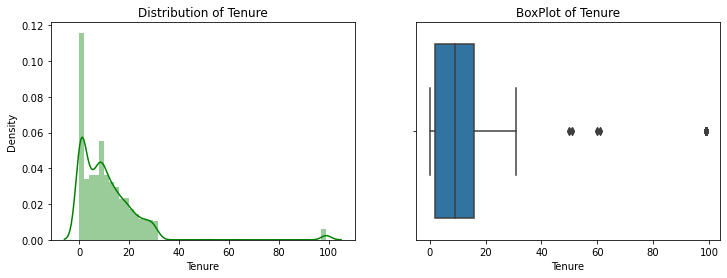

Description of CC_Contacted_LY
----------------------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
CC_Contacted_LY,11260.0,17.850178,8.814851,4.0,11.0,16.0,23.0,132.0


Number of Outliers : 42
----------------------------------------------------------------------------


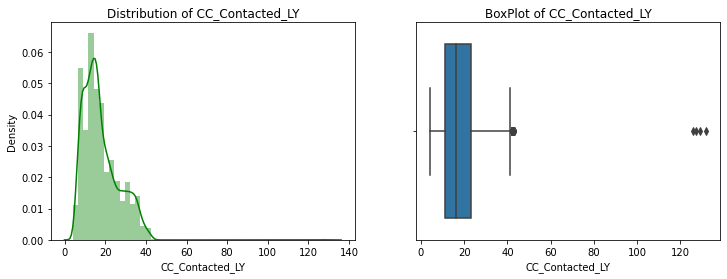

Description of Account_user_count
----------------------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
Account_user_count,11260.0,3.704973,1.004383,1.0,3.0,4.0,4.0,6.0


Number of Outliers : 761
----------------------------------------------------------------------------


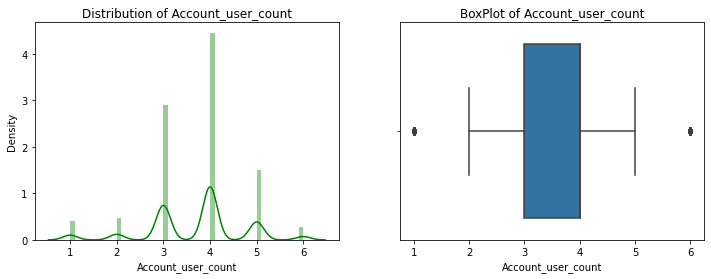

Description of rev_per_month
----------------------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
rev_per_month,11260.0,6.266874,11.48899,1.0,3.0,5.0,7.0,140.0


Number of Outliers : 185
----------------------------------------------------------------------------


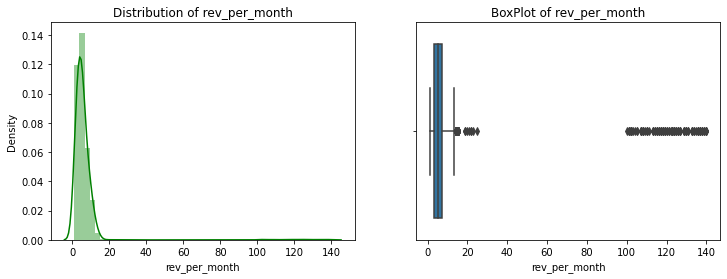

Description of rev_growth_yoy
----------------------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
rev_growth_yoy,11260.0,16.193073,3.757271,4.0,13.0,15.0,19.0,28.0


Number of Outliers : 0
----------------------------------------------------------------------------


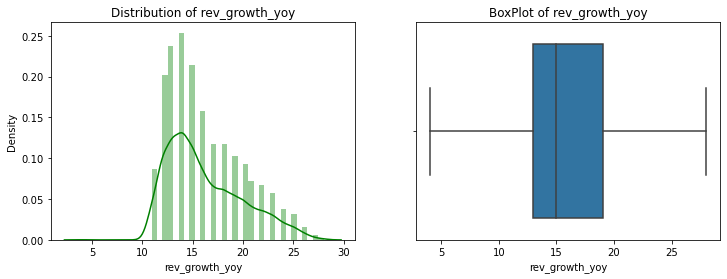

Description of coupon_used_for_payment
----------------------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
coupon_used_for_payment,11260.0,1.790409,1.969331,0.0,1.0,1.0,2.0,16.0


Number of Outliers : 1380
----------------------------------------------------------------------------


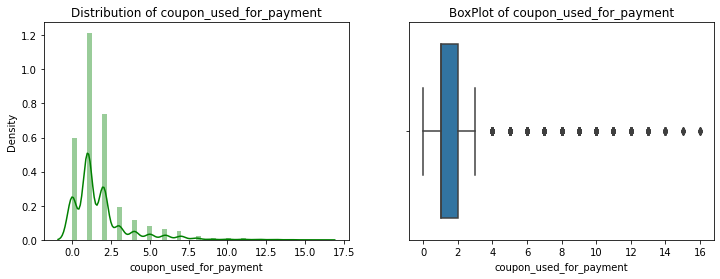

Description of Day_Since_CC_connect
----------------------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
Day_Since_CC_connect,11260.0,4.581261,3.649643,0.0,2.0,3.0,7.0,47.0


Number of Outliers : 130
----------------------------------------------------------------------------


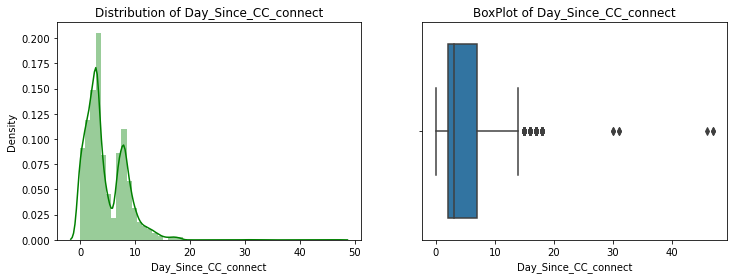

Description of cashback
----------------------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
cashback,11260.0,194.934722,174.977865,0.0,147.89,165.25,197.31,1997.0


Number of Outliers : 986
----------------------------------------------------------------------------


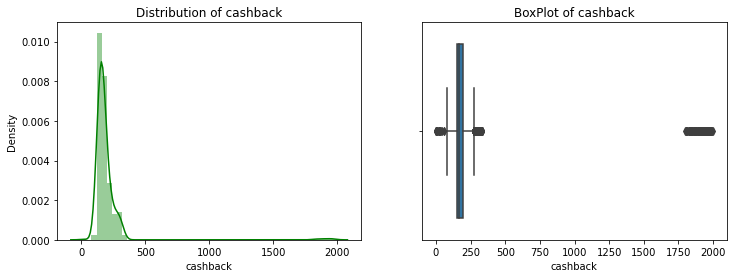

In [55]:
for i in num[1:]:
    univariateAnalysis_numeric(data=df2,column=i)

In [61]:
for i in num:
    print(i)

AccountID
Tenure
CC_Contacted_LY
Account_user_count
rev_per_month
rev_growth_yoy
coupon_used_for_payment
Day_Since_CC_connect
cashback


### Univariate Analysis Categoric

Details of Churn
----------------------------------------------------------------
0    9364
1    1896
Name: Churn, dtype: int64
       
Number of null values before : 0


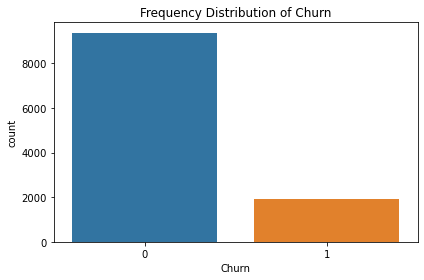

       
Details of City_Tier
----------------------------------------------------------------
1.0    7375
3.0    3405
2.0     480
Name: City_Tier, dtype: int64
       
Number of null values before : 112


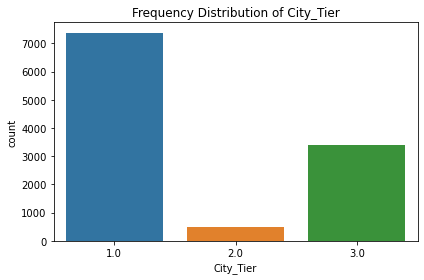

       
Details of Payment
----------------------------------------------------------------
Debit Card          4696
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64
       
Number of null values before : 109


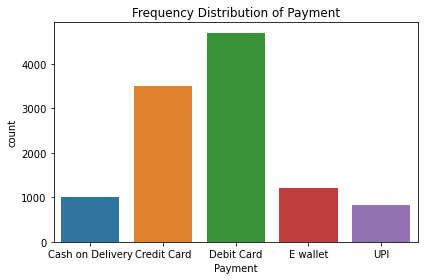

       
Details of Gender
----------------------------------------------------------------
M    6812
F    4448
Name: Gender, dtype: int64
       
Number of null values before : 108


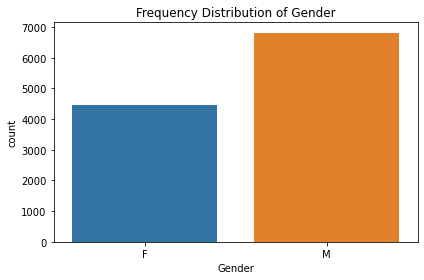

       
Details of Service_Score
----------------------------------------------------------------
3.0    5588
2.0    3251
4.0    2331
1.0      77
0.0       8
5.0       5
Name: Service_Score, dtype: int64
       
Number of null values before : 98


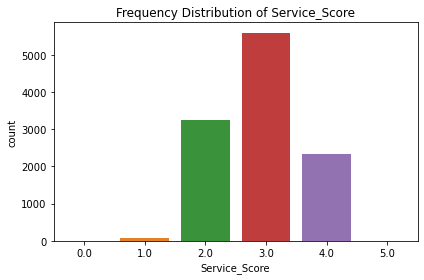

       
Details of account_segment
----------------------------------------------------------------
Regular Plus    4221
Super           4062
HNI             1639
Super Plus       818
Regular          520
Name: account_segment, dtype: int64
       
Number of null values before : 97


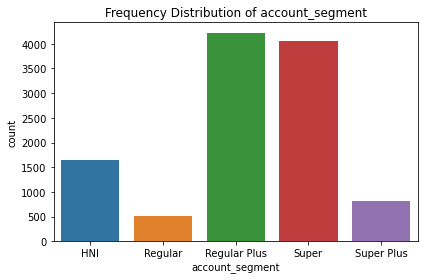

       
Details of CC_Agent_Score
----------------------------------------------------------------
3.0    3476
1.0    2302
5.0    2191
4.0    2127
2.0    1164
Name: CC_Agent_Score, dtype: int64
       
Number of null values before : 116


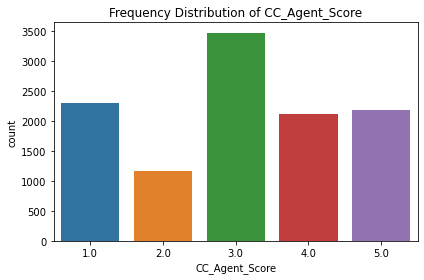

       
Details of Marital_Status
----------------------------------------------------------------
Married     6072
Single      3520
Divorced    1668
Name: Marital_Status, dtype: int64
       
Number of null values before : 212


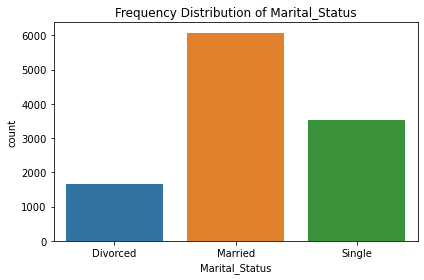

       
Details of Complain_ly
----------------------------------------------------------------
0.0    8149
1.0    3111
Name: Complain_ly, dtype: int64
       
Number of null values before : 357


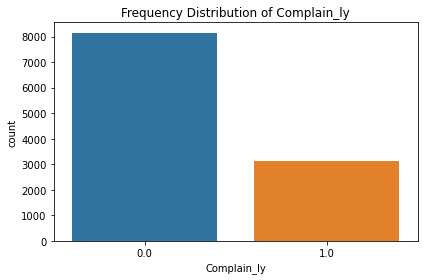

       
Details of Login_device
----------------------------------------------------------------
Mobile      8242
Computer    3018
Name: Login_device, dtype: int64
       
Number of null values before : 760


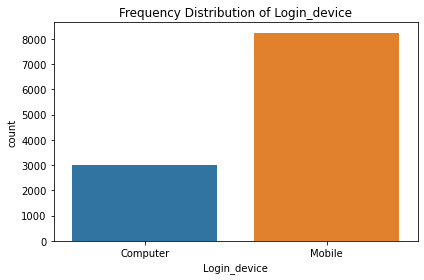

In [65]:
for i in cat:
    univariateAnalysis_category(data=df2,cat_column=i,count_null=df1)

In [52]:
pt=pd.DataFrame()
for i in cat:
    pl=Min_Max(df2,i)
    pt=pd.concat([pl,pt],axis=0)

pt

,columns,majority,minority
0,Login_device,Mobile_73.0%,Computer_27.0%
0,Complain_ly,0.0_72.0%,1.0_28.000000000000004%
0,Marital_Status,Married_54.0%,Divorced_15.0%
0,CC_Agent_Score,3.0_31.0%,2.0_10.0%
0,account_segment,Regular Plus_37.0%,Regular_5.0%
0,Service_Score,3.0_50.0%,5.0_0.0%
0,Gender,M_60.0%,F_40.0%
0,Payment,Debit Card_42.0%,UPI_7.000000000000001%
0,City_Tier,1.0_65.0%,2.0_4.0%
0,Churn,0_83.0%,1_17.0%


In [51]:
def Min_Max(df2,i):
    ins=pd.DataFrame()
    g=pd.DataFrame(df2[i].value_counts(normalize=True)).reset_index().sort_values(by=i,ascending=False)
    ma=g.head(1)
    mi=g.tail(1)
    mai=ma['index'].to_list()
    mii=mi['index'].to_list()
    mav=round(*ma[i].to_list(),2)*100
    miv=round(*mi[i].to_list(),2)*100
    ins['columns']=[i]
    ins['majority']=[str(*mai)+'_'+str(mav)+'%']
    ins['minority']=[str(*mii)+'_'+str(miv)+'%']
    return ins

### Bivariate analysis

In [96]:
def Bivariate_num_analysis(data,target,col2):
    df_temp,a,b=data,target,col2
    print('--------------------------------------------')
    print('Bivariate Analysis of {} and {}'.format(b,a))
    print('--------------------------------------------')
    print('Box Plot of {} and {}'.format(b,a))
    sns.boxplot(data=df_temp,x=a,y=b,color='g');
    plt.show()
#     Temporary change
    LL, UL = remove_outlier(df_temp[col2])
    TT=df_temp[df_temp[col2] > UL].shape[0] +df_temp[df_temp[col2] < LL].shape[0] 
    df_temp_0=df_temp.groupby(target).get_group(0).copy()
    df_temp_1=df_temp.groupby(target).get_group(1).copy()
    LL0, UL0 = remove_outlier(df_temp_0[col2])
    TT0=df_temp_0[df_temp_0[col2] > UL0].shape[0] +df_temp_0[df_temp_0[col2] < LL0].shape[0]
    LL1, UL1 = remove_outlier(df_temp_1[col2])
    TT1=df_temp_1[df_temp_1[col2] > UL1].shape[0] +df_temp_1[df_temp_1[col2] < LL1].shape[0]
    df_tb=pd.DataFrame([TT0,TT1,TT,(TT0+TT1)],index=['Out_wrt_0','Out_wtr_1','Outliers','Total_out_wtr_1,0'],columns=[col2]).T
    df_tb['Median_0']=df_temp_0[col2].median()
    df_tb['Median_1']=df_temp_1[col2].median()
    display(df_tb)

In [50]:
def Bivariate_num_analysis0(data,target,col2):
    df_temp,a,b=data,target,col2
    print('--------------------------------------------')
    print('Bivariate Analysis of {} and {}'.format(b,a))
    print('--------------------------------------------')
    print('Box Plot of {} and {}'.format(b,a))
    sns.boxplot(data=df_temp,x=a,y=b);
    plt.show()

In [92]:
def Bivariate_cat_analysis(data,target,col2):
    df_temp,a,b=data,target,col2
    print('--------------------------------------------')
    print('Bivariate Analysis of {} and {}'.format(b,a))
    print('--------------------------------------------')
    print('Count Plot between {} and {}'.format(b,a))
    sns.countplot(data=df_temp,hue=b,x=a,color='g');
    plt.show()


### Bivariate analysis of Churn and numerical values

--------------------------------------------
Bivariate Analysis of Tenure and Churn
--------------------------------------------
Box Plot of Tenure and Churn


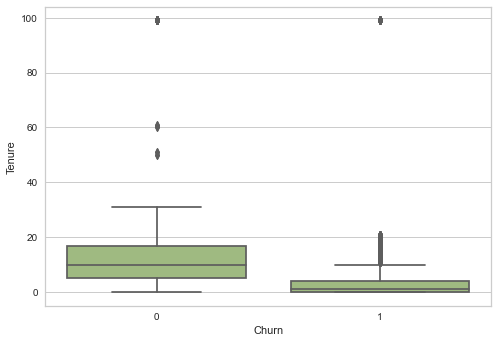

,Out_wrt_0,Out_wtr_1,Outliers,"Total_out_wtr_1,0",Median_0,Median_1
Tenure,115,237,139,352,10.0,1.0


--------------------------------------------
Bivariate Analysis of CC_Contacted_LY and Churn
--------------------------------------------
Box Plot of CC_Contacted_LY and Churn


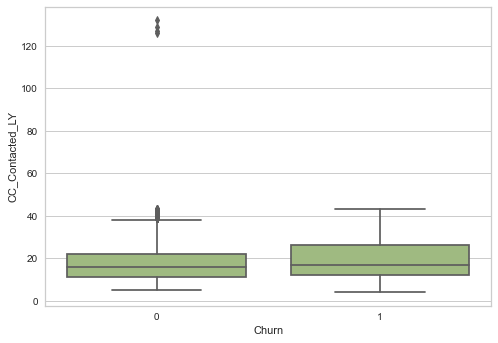

,Out_wrt_0,Out_wtr_1,Outliers,"Total_out_wtr_1,0",Median_0,Median_1
CC_Contacted_LY,145,0,42,145,16.0,17.0


--------------------------------------------
Bivariate Analysis of Account_user_count and Churn
--------------------------------------------
Box Plot of Account_user_count and Churn


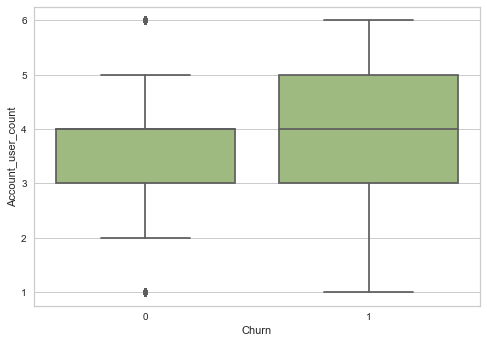

,Out_wrt_0,Out_wtr_1,Outliers,"Total_out_wtr_1,0",Median_0,Median_1
Account_user_count,608,0,761,608,4.0,4.0


--------------------------------------------
Bivariate Analysis of rev_per_month and Churn
--------------------------------------------
Box Plot of rev_per_month and Churn


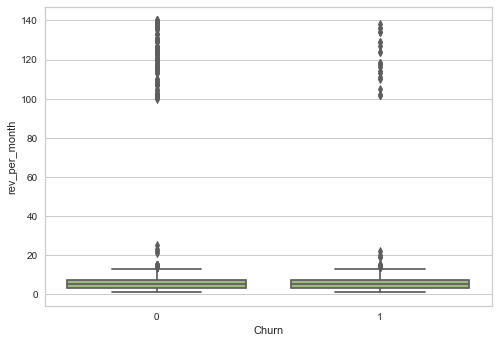

,Out_wrt_0,Out_wtr_1,Outliers,"Total_out_wtr_1,0",Median_0,Median_1
rev_per_month,141,44,185,185,5.0,5.0


--------------------------------------------
Bivariate Analysis of rev_growth_yoy and Churn
--------------------------------------------
Box Plot of rev_growth_yoy and Churn


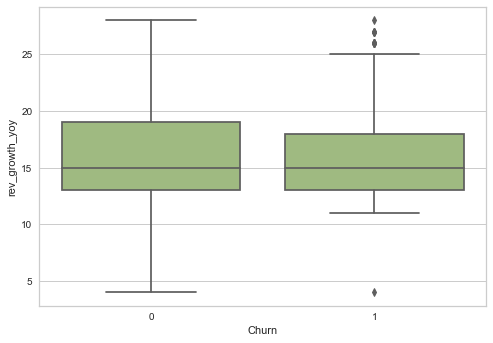

,Out_wrt_0,Out_wtr_1,Outliers,"Total_out_wtr_1,0",Median_0,Median_1
rev_growth_yoy,0,17,0,17,15.0,15.0


--------------------------------------------
Bivariate Analysis of coupon_used_for_payment and Churn
--------------------------------------------
Box Plot of coupon_used_for_payment and Churn


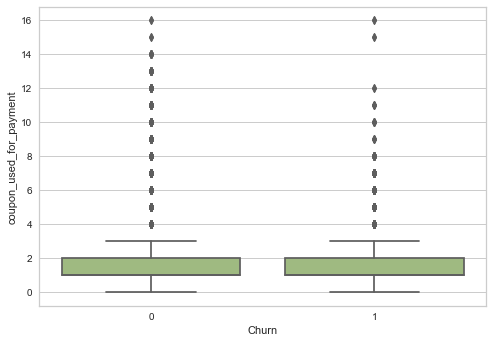

,Out_wrt_0,Out_wtr_1,Outliers,"Total_out_wtr_1,0",Median_0,Median_1
coupon_used_for_payment,1160,220,1380,1380,1.0,1.0


--------------------------------------------
Bivariate Analysis of Day_Since_CC_connect and Churn
--------------------------------------------
Box Plot of Day_Since_CC_connect and Churn


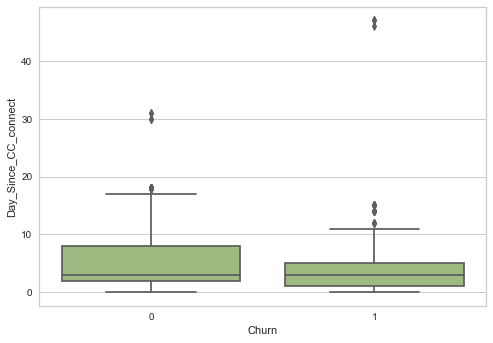

,Out_wrt_0,Out_wtr_1,Outliers,"Total_out_wtr_1,0",Median_0,Median_1
Day_Since_CC_connect,30,21,130,51,3.0,3.0


--------------------------------------------
Bivariate Analysis of cashback and Churn
--------------------------------------------
Box Plot of cashback and Churn


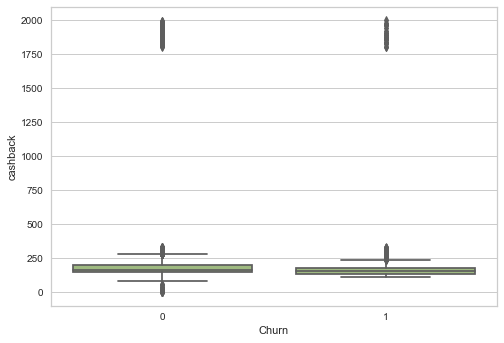

,Out_wrt_0,Out_wtr_1,Outliers,"Total_out_wtr_1,0",Median_0,Median_1
cashback,799,97,986,896,166.15,153.46


In [97]:
target='Churn'
# col2=num[5]
data=df2
for i in num[1:]:
    Bivariate_num_analysis(data,target,col2=i)

--------------------------------------------
Bivariate Analysis of Tenure and Churn
--------------------------------------------
Box Plot of Tenure and Churn


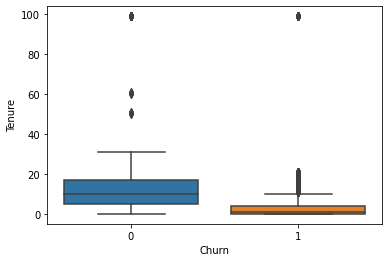

,Out_wrt_0,Out_wtr_1,Outliers,"Total_out_wtr_1,0",Median_0,Median_1
Tenure,115,237,139,352,10.0,1.0


--------------------------------------------
Bivariate Analysis of CC_Contacted_LY and Churn
--------------------------------------------
Box Plot of CC_Contacted_LY and Churn


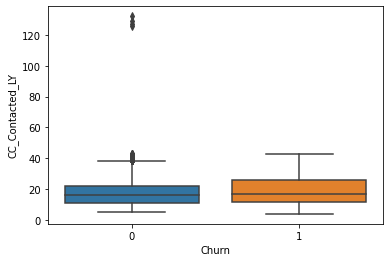

,Out_wrt_0,Out_wtr_1,Outliers,"Total_out_wtr_1,0",Median_0,Median_1
CC_Contacted_LY,145,0,42,145,16.0,17.0


--------------------------------------------
Bivariate Analysis of Account_user_count and Churn
--------------------------------------------
Box Plot of Account_user_count and Churn


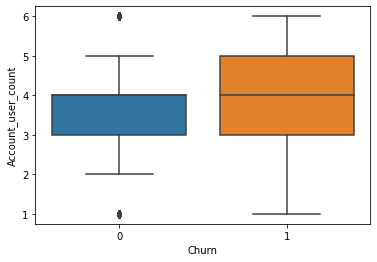

,Out_wrt_0,Out_wtr_1,Outliers,"Total_out_wtr_1,0",Median_0,Median_1
Account_user_count,608,0,761,608,4.0,4.0


--------------------------------------------
Bivariate Analysis of rev_per_month and Churn
--------------------------------------------
Box Plot of rev_per_month and Churn


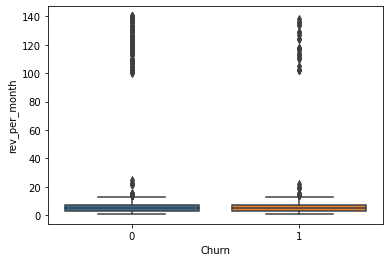

,Out_wrt_0,Out_wtr_1,Outliers,"Total_out_wtr_1,0",Median_0,Median_1
rev_per_month,141,44,185,185,5.0,5.0


--------------------------------------------
Bivariate Analysis of rev_growth_yoy and Churn
--------------------------------------------
Box Plot of rev_growth_yoy and Churn


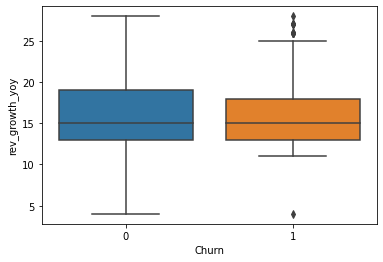

,Out_wrt_0,Out_wtr_1,Outliers,"Total_out_wtr_1,0",Median_0,Median_1
rev_growth_yoy,0,17,0,17,15.0,15.0


--------------------------------------------
Bivariate Analysis of coupon_used_for_payment and Churn
--------------------------------------------
Box Plot of coupon_used_for_payment and Churn


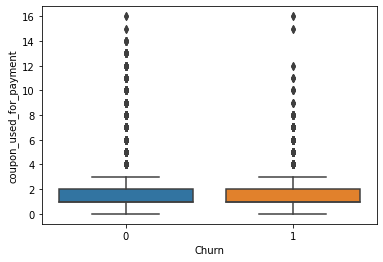

,Out_wrt_0,Out_wtr_1,Outliers,"Total_out_wtr_1,0",Median_0,Median_1
coupon_used_for_payment,1160,220,1380,1380,1.0,1.0


--------------------------------------------
Bivariate Analysis of Day_Since_CC_connect and Churn
--------------------------------------------
Box Plot of Day_Since_CC_connect and Churn


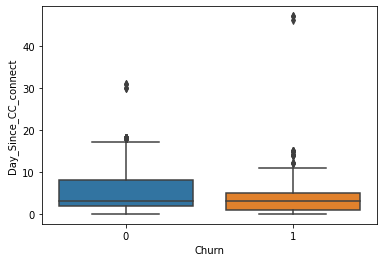

,Out_wrt_0,Out_wtr_1,Outliers,"Total_out_wtr_1,0",Median_0,Median_1
Day_Since_CC_connect,30,21,130,51,3.0,3.0


--------------------------------------------
Bivariate Analysis of cashback and Churn
--------------------------------------------
Box Plot of cashback and Churn


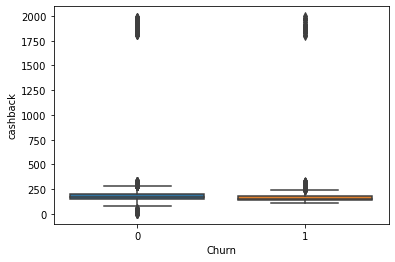

,Out_wrt_0,Out_wtr_1,Outliers,"Total_out_wtr_1,0",Median_0,Median_1
cashback,799,97,986,896,166.15,153.46


In [115]:
target='Churn'
# col2=num[5]
data=df2
for i in num[1:]:
    Bivariate_num_analysis(data,target,col2=i)

#### Cashback and account segment

--------------------------------------------
Bivariate Analysis of cashback and account_segment
--------------------------------------------
Box Plot of cashback and account_segment


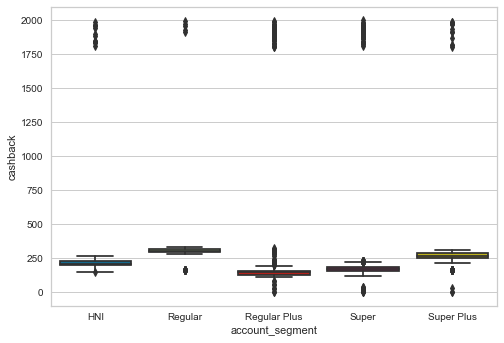

account_segment
HNI             208.950
Regular         302.490
Regular Plus    146.320
Super           168.060
Super Plus      268.775
Name: cashback, dtype: float64


In [166]:
target='account_segment'
data=df2
i='cashback'
Bivariate_num_analysis0(data,target,col2=i)
print(df2.groupby(target)[i].median())
# print(df2.groupby(target)[i].me())

<AxesSubplot:xlabel='rev_per_month', ylabel='Day_Since_CC_connect'>

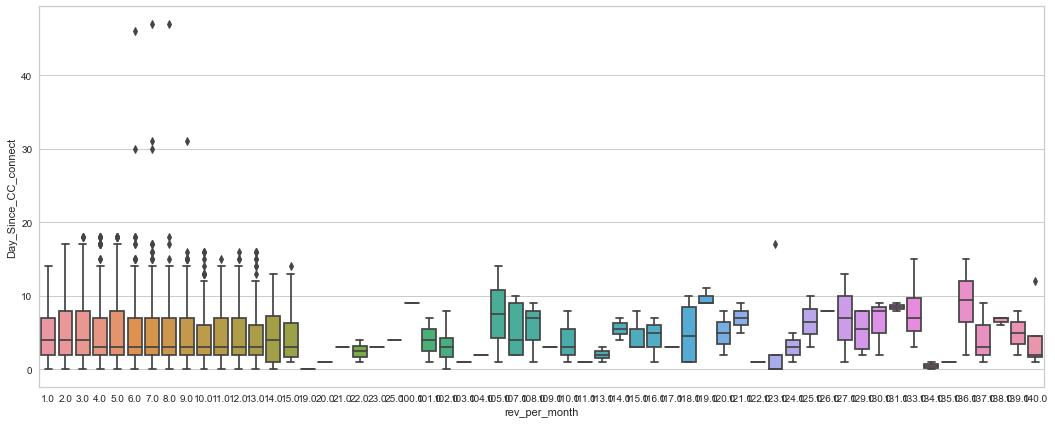

In [62]:
df2[num[-3]]
plt.figure(figsize=(18,7))
sns.boxplot(data=df2,x=df2[num[4]],y=df2[num[-2]])

### Bivariate analysis of Churn and categorical values

--------------------------------------------
Bivariate Analysis of City_Tier and Churn
--------------------------------------------
Count Plot between City_Tier and Churn


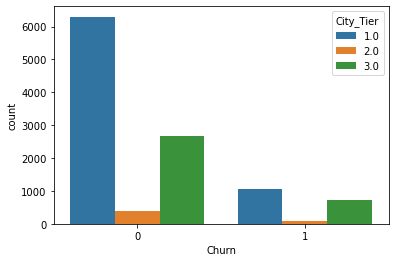

--------------------------------------------
Bivariate Analysis of Payment and Churn
--------------------------------------------
Count Plot between Payment and Churn


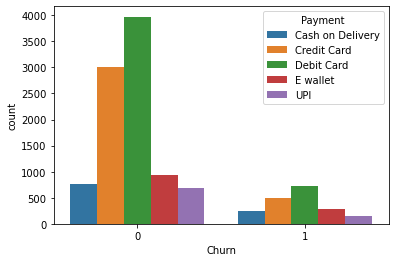

--------------------------------------------
Bivariate Analysis of Gender and Churn
--------------------------------------------
Count Plot between Gender and Churn


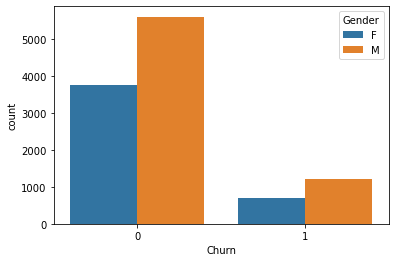

--------------------------------------------
Bivariate Analysis of Service_Score and Churn
--------------------------------------------
Count Plot between Service_Score and Churn


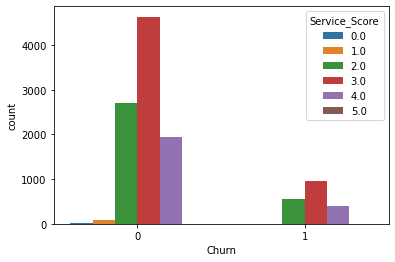

--------------------------------------------
Bivariate Analysis of account_segment and Churn
--------------------------------------------
Count Plot between account_segment and Churn


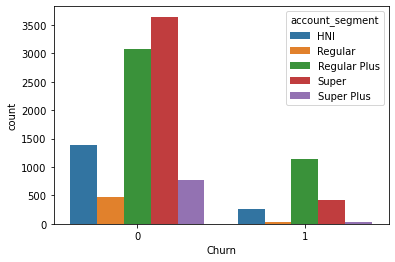

--------------------------------------------
Bivariate Analysis of CC_Agent_Score and Churn
--------------------------------------------
Count Plot between CC_Agent_Score and Churn


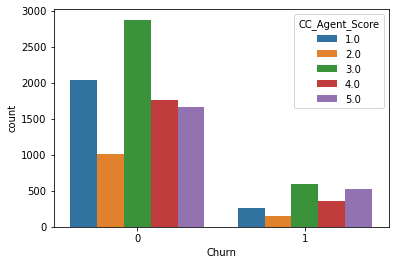

--------------------------------------------
Bivariate Analysis of Marital_Status and Churn
--------------------------------------------
Count Plot between Marital_Status and Churn


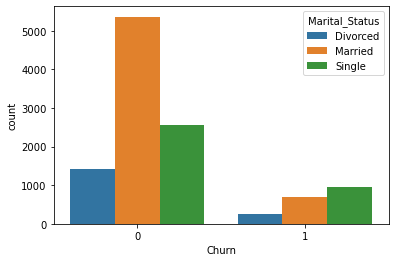

--------------------------------------------
Bivariate Analysis of Complain_ly and Churn
--------------------------------------------
Count Plot between Complain_ly and Churn


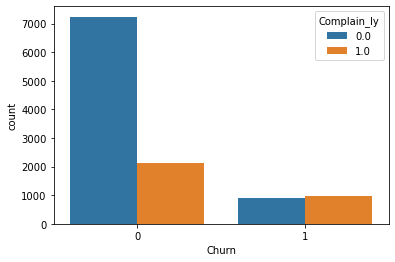

--------------------------------------------
Bivariate Analysis of Login_device and Churn
--------------------------------------------
Count Plot between Login_device and Churn


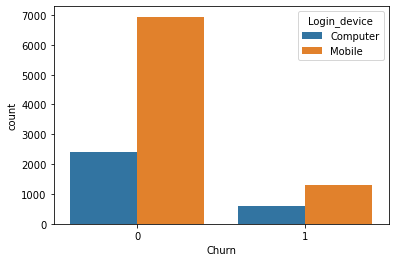

In [77]:
target='Churn'
# col2=num[5]
data=df2
for i in cat[1:]:
    Bivariate_cat_analysis(data,target,col2=i)

### Pairplopt

<Figure size 1080x792 with 0 Axes>

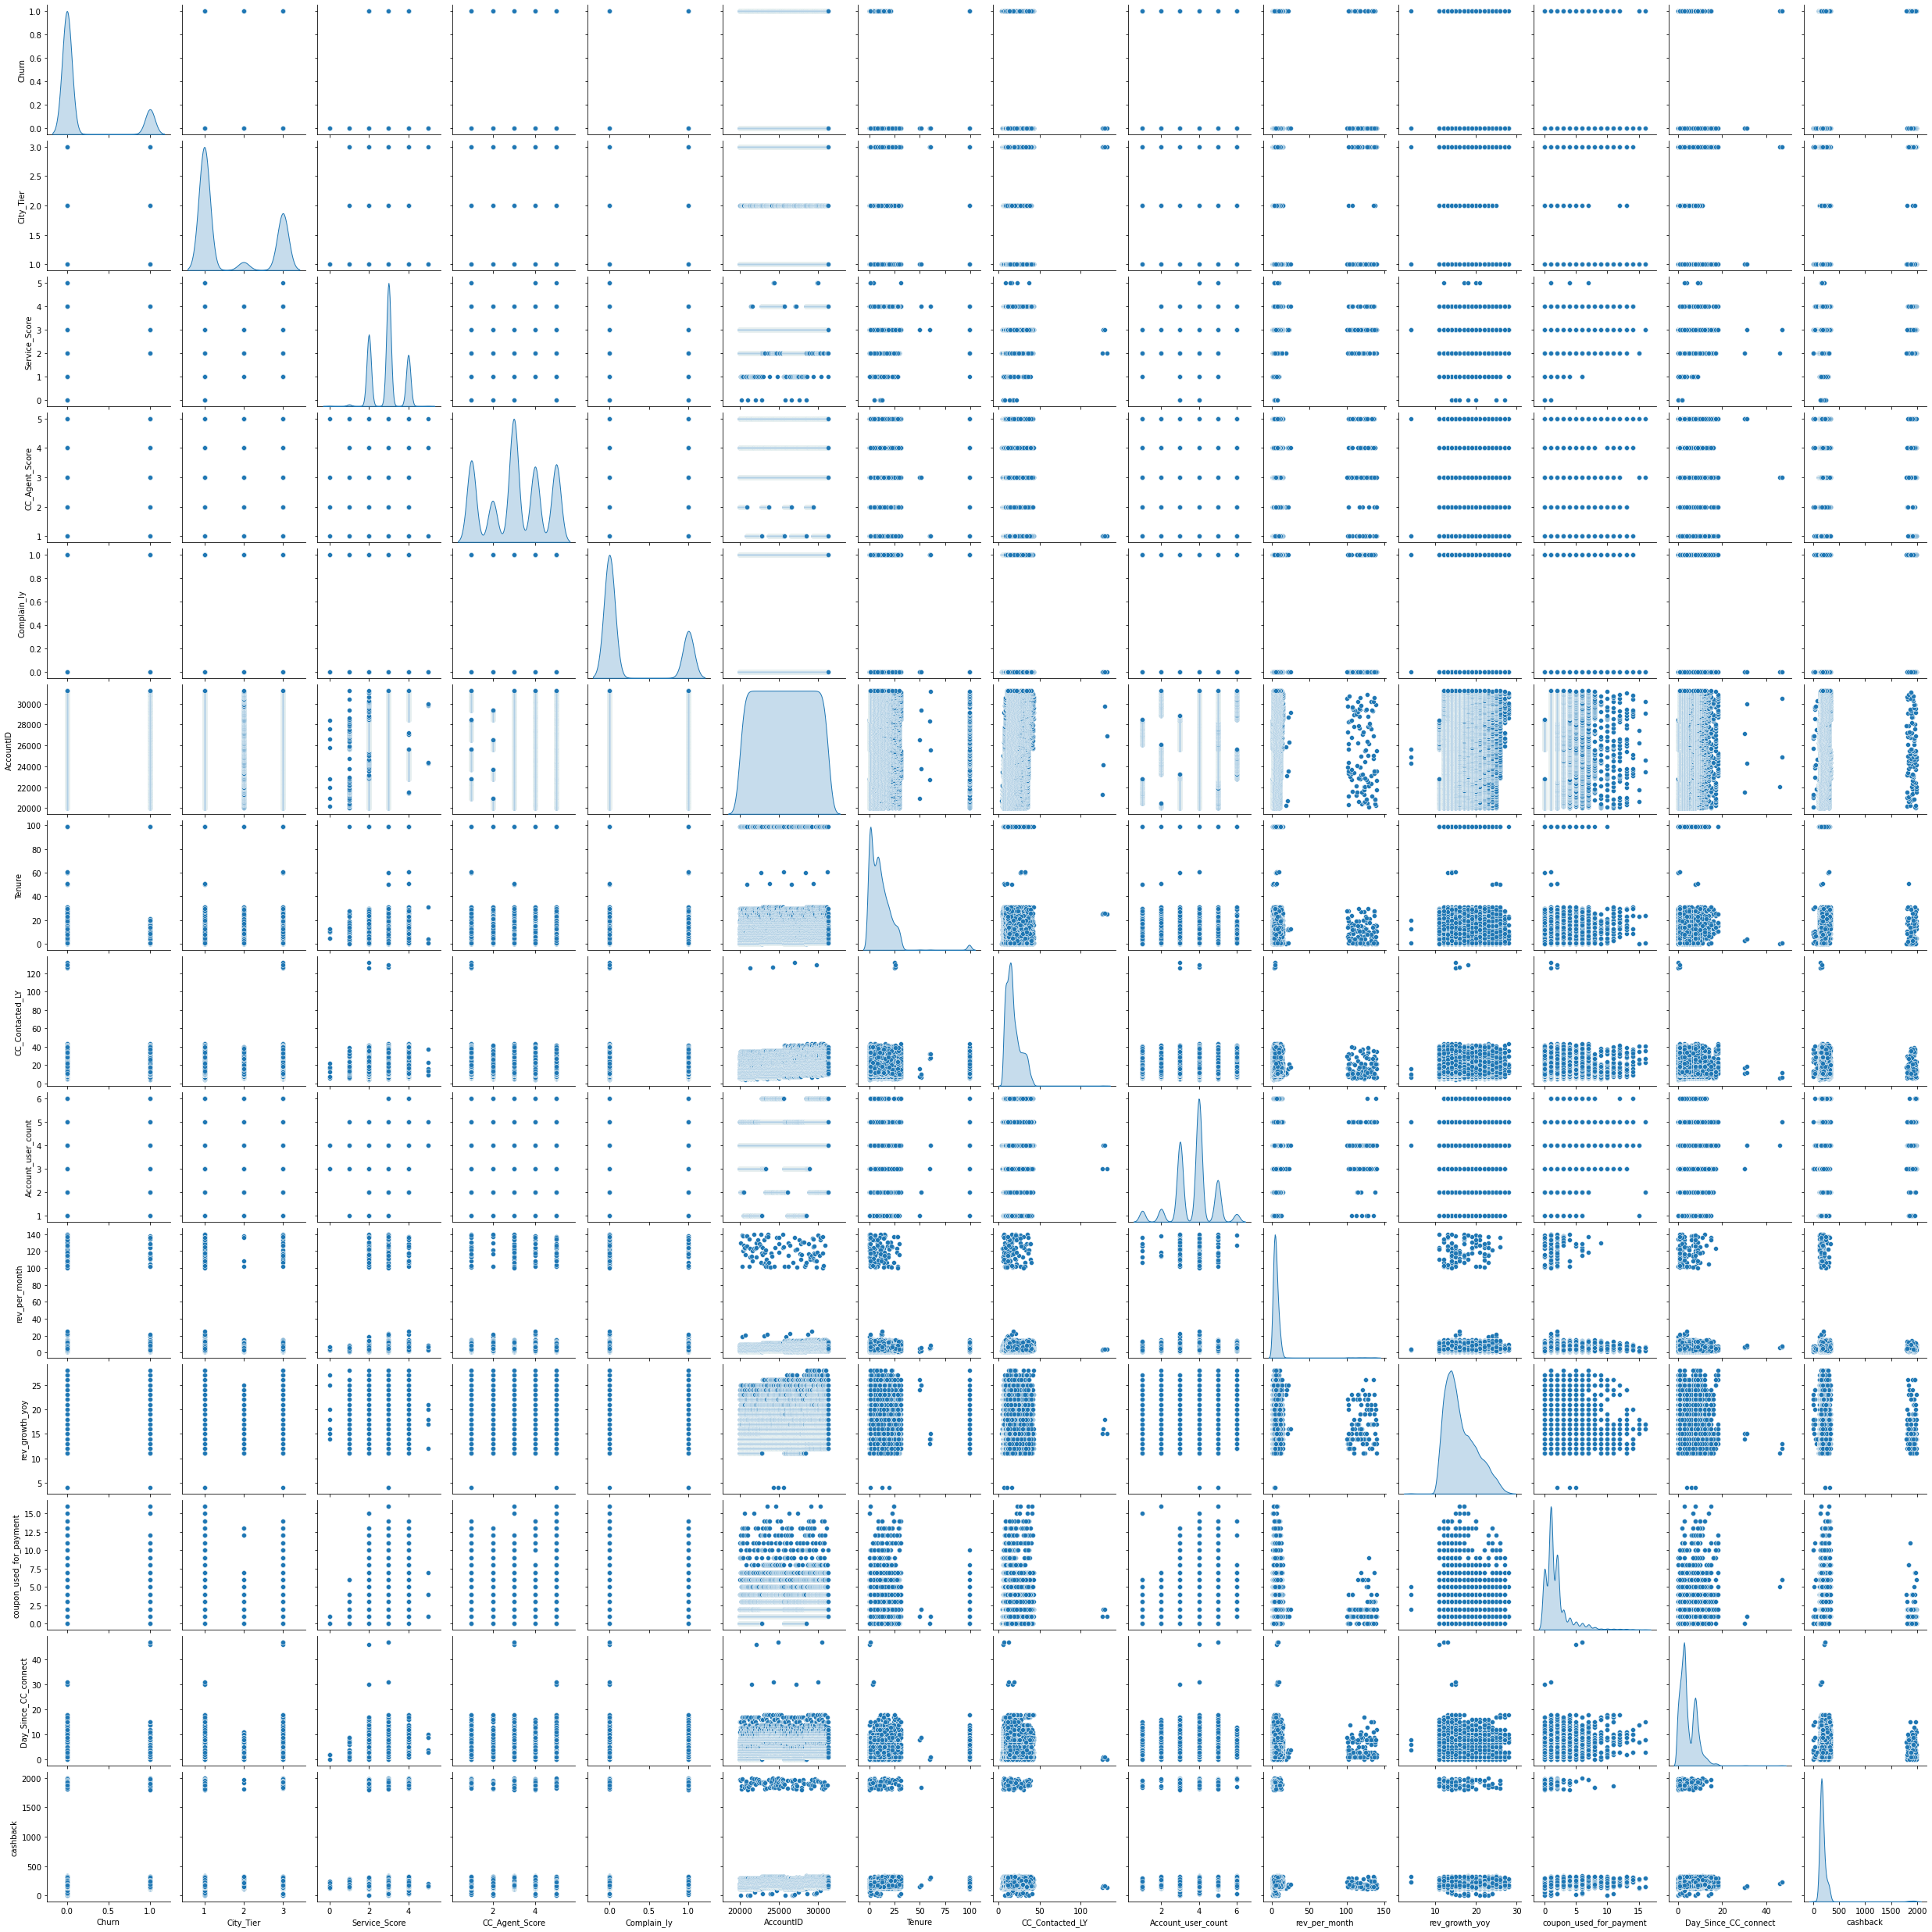

In [151]:
plt.figure(figsize=(15,11))
df00=df2.copy()
num,cat,cat_str=seperate_datatype(df2)
cat_num=cat
for i in cat_str:
    cat_num.remove(i)
for i in cat_num:
    df00[i]=pd.to_numeric(df00[i])
col=cat_num+num
sns.pairplot(df00[col],diag_kind='kde')

### Heatmap based on correlation

In [53]:
# plt.figure(figsize=(15,11))
# df00=df2.copy()
# num,cat,cat_str=seperate_datatype(df2)
# cat_num=cat
# for i in cat_str:
#     cat_num.remove(i)
# for i in cat_num:
#     df00[i]=pd.to_numeric(df00[i])
# print(cat_num)
# sns.heatmap(df00[dfc[1:]].corr(),annot=True,)

['Churn', 'City_Tier', 'Service_Score', 'CC_Agent_Score', 'Complain_ly']


<AxesSubplot:>

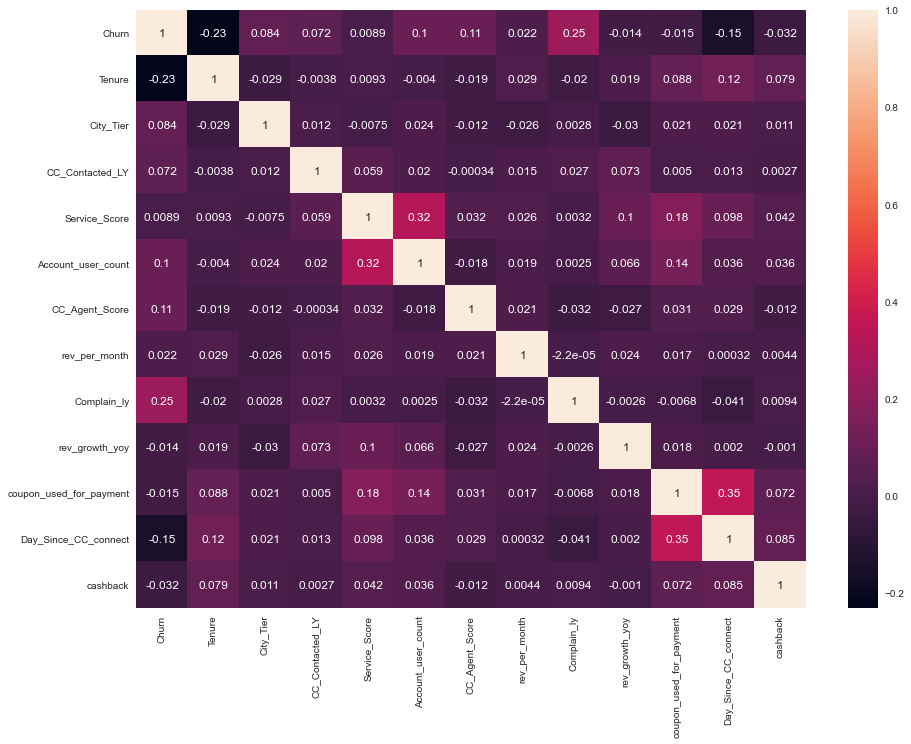

In [52]:
plt.figure(figsize=(15,11))
df_hm=df2.copy()
num,cat,cat_str=seperate_datatype(df2)
cat_num=cat
for i in cat_str:
    cat_num.remove(i)
for i in cat_num:
    df_hm[i]=pd.to_numeric(df_hm[i])
print(cat_num)
df_hm.drop('AccountID',axis=1,inplace=True)
sns.heatmap(df_hm.corr(),annot=True,)

### Infrerence 
  Coupon_used_for_payment and days_since_last_connect has the highest positive correlation of 0.35 i.e, Day_Since_CC_connect increases with increase in  coupon_used_for_payment  a positive trend
  coupon_used_for_payment and Service_Score has a positive correlation of 0.18  ,i.e coupon_used_for_payment increases with increase in  Service_Score a positive trend
  Followed by Payment and Account_user_count has a positive correlation of 0.32  ,i.e Payment increases with increase in  Account_user_count a positive trend
  Churn and Complain_ly has a positive correlation of 0.25  ,i.e Churn increases with increase in  Complain_ly a positive trend
Negative correlation 
    Tenure and Churn has a negative correlation of -0.23,i.e Tenure decreases with decrease in  Churn a negative trend
    Day_Since_CC_connect and Churn has a negative correlation of -0.15  ,i.e Day_Since_CC_connect decreases with decrease in  Churn a negative trend
    Service_Score' has high positive correlation with  'rev_growth_yoy' ,'Account_user_count',  'rev_per_month'

In [233]:
dfc

Index(['AccountID', 'Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY',
       'Payment', 'Gender', 'Service_Score', 'Account_user_count',
       'account_segment', 'CC_Agent_Score', 'Marital_Status', 'rev_per_month',
       'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment',
       'Day_Since_CC_connect', 'cashback', 'Login_device'],
      dtype='object')

#### Boxplots

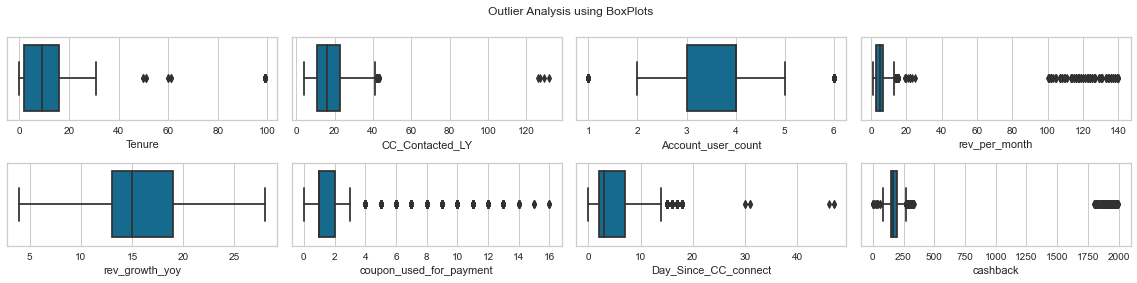

In [84]:
fig, ax = plt.subplots(2,4, figsize = (16, 4))
ax = ax.flatten()

for i, c in enumerate(num[1:]):
    sns.boxplot(data = df2,x=c, ax = ax[i],color='b')
plt.suptitle('Outlier Analysis using BoxPlots', fontsize = 12)
fig.tight_layout()

#### Numerical values Distribution

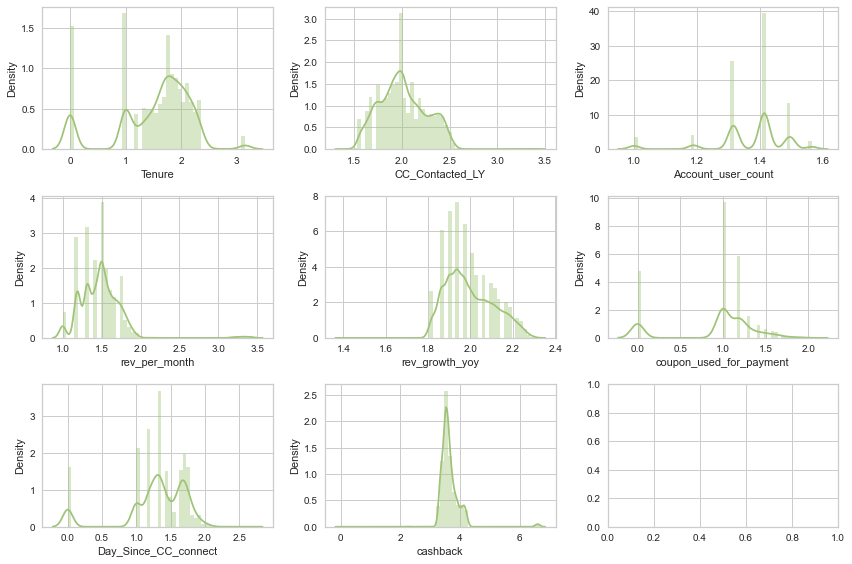

In [147]:
fig, ax = plt.subplots(3,3, figsize = (12, 8))
ax = ax.flatten()

for i, c in enumerate(num[1:]):
    sns.distplot(df_4rt[c], kde=True, color='g',ax=ax[i]);
fig.tight_layout()

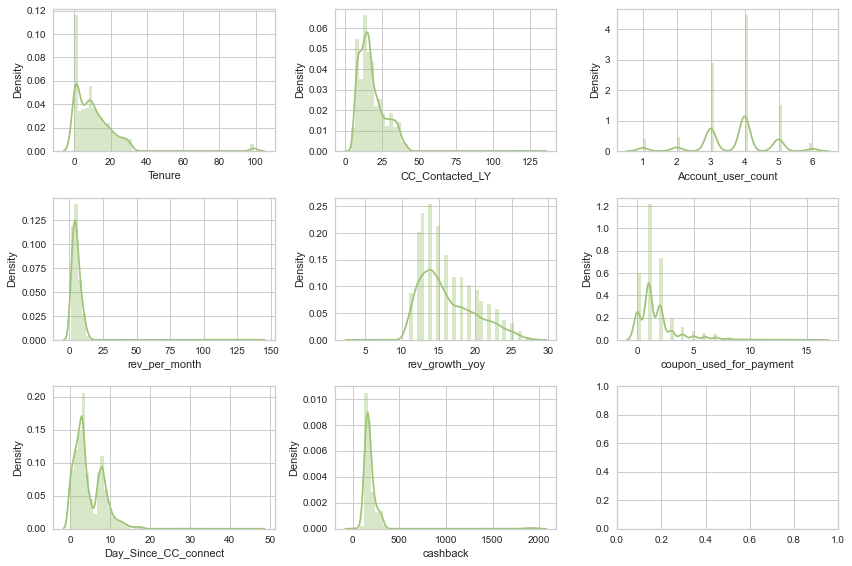

In [86]:
fig, ax = plt.subplots(3,3, figsize = (12, 8))
ax = ax.flatten()

for i, c in enumerate(num[1:]):
    sns.distplot(df2[c], kde=True, color='g',ax=ax[i]);
fig.tight_layout()

#### Categorical values Distribution

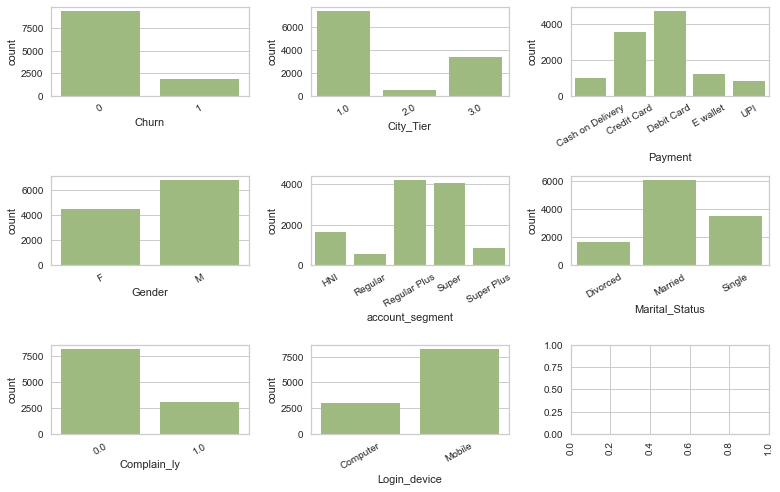

In [89]:
fig, ax = plt.subplots(3,3, figsize = (11, 7))
ax = ax.flatten()

for i, c in enumerate(cat1):
    plt.xticks(rotation='90')
    ax1=sns.countplot(data=df2,x=c, color='g',ax=ax[i]);
    ax1.tick_params(axis='x', rotation=30)
    
#     plt.show()
fig.tight_layout()

#### Numerical variables w.r.t to Churn

Text(0.5, 0.98, 'Bivariate Analysis using BoxPlots')

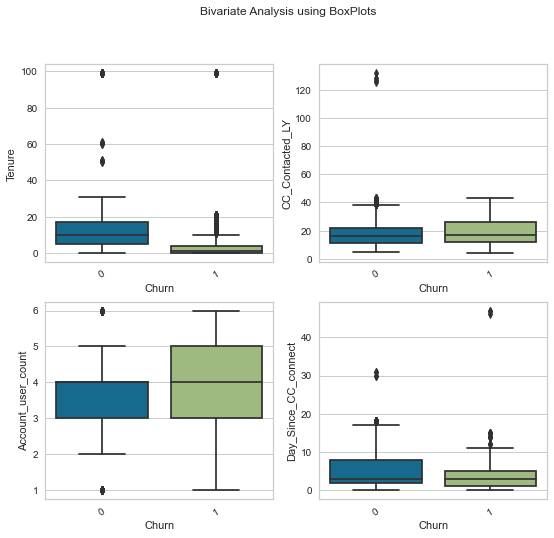

In [66]:
numm=num[1:4]
numm.append(num[-2])
df_temp=df2.copy()
a='Churn'
fig, ax = plt.subplots(2,2, figsize = (9, 8))
ax = ax.flatten()

for i, b in enumerate(numm):
    plt.xticks(rotation='90')
    ax1=sns.boxplot(data=df_temp,x=a,y=b,ax=ax[i])
#     ax1=sns.countplot(data=df2,x=c, color='g',ax=ax[i]);
    ax1.tick_params(axis='x', rotation=30)
plt.suptitle('Bivariate Analysis using BoxPlots', fontsize = 12)

#### Categorical variables w.r.t to Churn

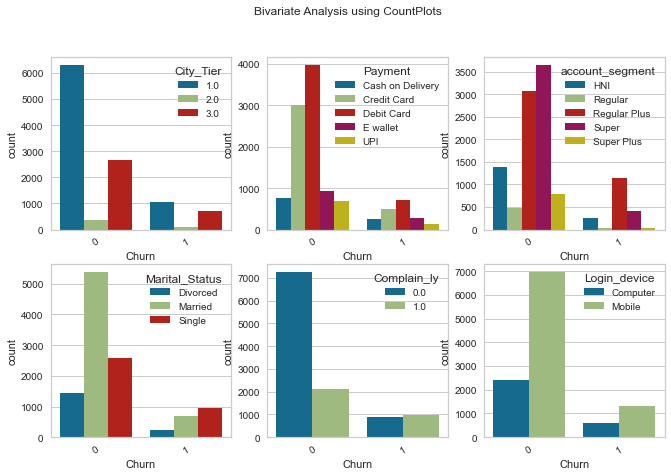

In [68]:
num,cat,cat_str=seperate_datatype(df1)
cat_str
len(cat)
cat
cat1=cat
pr=['Service_Score','CC_Agent_Score']
for i in pr:
    cat1.remove(i)
cat1.remove('Gender')
df_temp=df2.copy()
a='Churn'
fig, ax = plt.subplots(2,3, figsize = (11, 7))
ax = ax.flatten()

for i, b in enumerate(cat1[1:]):
    plt.xticks(rotation='90')
    ax1=sns.countplot(data=df_temp,x=a,hue=b,ax=ax[i])
#     ax1=sns.countplot(data=df2,x=c, color='g',ax=ax[i]);
    ax1.tick_params(axis='x', rotation=30)
plt.suptitle('Bivariate Analysis using CountPlots', fontsize = 12);

## Outlier Treatment

In [55]:
def Outlier_analysis(data,target,col2):
    df_temp=data
    LL, UL = remove_outlier(df_temp[col2])
    TT=df_temp[df_temp[col2] > UL].shape[0] +df_temp[df_temp[col2] < LL].shape[0] 
    df_temp_0=df_temp.groupby(target).get_group(0).copy()
    df_temp_1=df_temp.groupby(target).get_group(1).copy()
    LL0, UL0 = remove_outlier(df_temp_0[col2])
    TT0=df_temp_0[df_temp_0[col2] > UL0].shape[0] +df_temp_0[df_temp_0[col2] < LL0].shape[0]
    LL1, UL1 = remove_outlier(df_temp_1[col2])
    TT1=df_temp_1[df_temp_1[col2] > UL1].shape[0] +df_temp_1[df_temp_1[col2] < LL1].shape[0]
    df_tb=pd.DataFrame([TT0,TT1,TT,(TT0+TT1)],index=['Out_wrt_0','Out_wtr_1','Outliers','Total_out_wtr_1,0'],columns=[col2]).T
#     df_tb['Median_0']=df_temp_0[col2].median()
#     df_tb['Median_1']=df_temp_1[col2].median()
    return df_tb

In [58]:
data=df2
target='Churn'
col2=num[1]
fg=Outlier_analysis(data,target,col2)
for i in num[2:]:
    fg1=Outlier_analysis(data,target,col2=i)
    fg=pd.concat([fg,fg1],axis=0)
fg

,Out_wrt_0,Out_wtr_1,Outliers,"Total_out_wtr_1,0"
Tenure,115,237,139,352
CC_Contacted_LY,145,0,42,145
Account_user_count,608,0,761,608
rev_per_month,141,44,185,185
rev_growth_yoy,0,17,0,17
coupon_used_for_payment,1160,220,1380,1380
Day_Since_CC_connect,30,21,130,51
cashback,799,97,986,896


In [59]:
df_out=df2.copy()
for i in num[1:]:
    LL, UL = remove_outlier(df_out[i])
    df_out[i] = np.where(df_out[i] > UL, UL, df_out[i])
    df_out[i] = np.where(df_out[i] < LL, LL, df_out[i])

In [60]:
data=df_out
target='Churn'
col2=num[1]
fg=Outlier_analysis(data,target,col2)
for i in num[2:]:
    fg1=Outlier_analysis(data,target,col2=i)
    fg=pd.concat([fg,fg1],axis=0)
fg

,Out_wrt_0,Out_wtr_1,Outliers,"Total_out_wtr_1,0"
Tenure,115,237,0,352
CC_Contacted_LY,145,0,0,145
Account_user_count,0,0,0,0
rev_per_month,0,0,0,0
rev_growth_yoy,0,17,0,17
coupon_used_for_payment,0,0,0,0
Day_Since_CC_connect,0,21,0,21
cashback,0,97,0,97


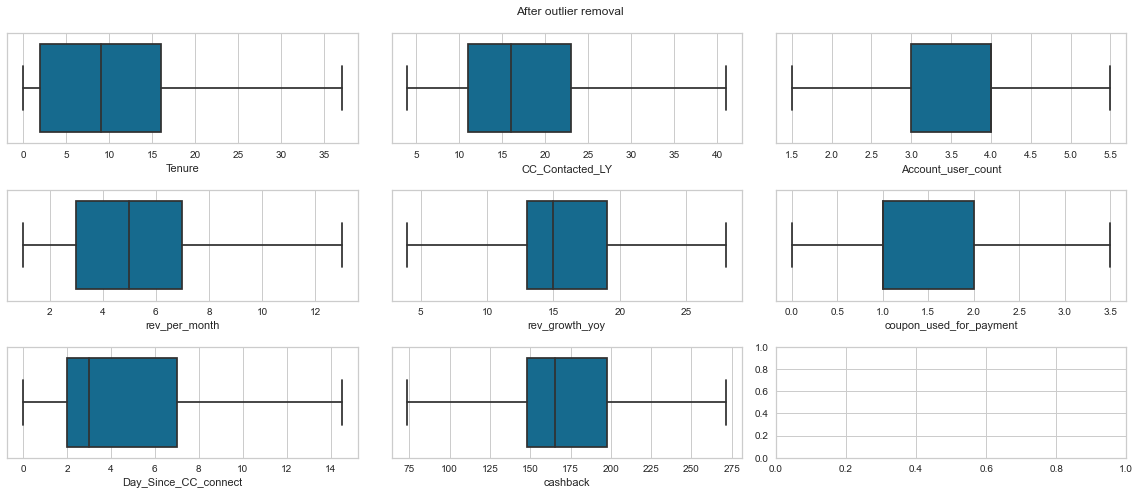

In [61]:
fig, ax = plt.subplots(3, 3, figsize = (16, 7))
ax = ax.flatten()

for i, c in enumerate(num[1:]):
    sns.boxplot(data = df_out,x=c, ax = ax[i])
plt.suptitle('After outlier removal', fontsize = 12)
fig.tight_layout()

### Variable Transformation

In [87]:
for i, c in enumerate(num[1:]):
    print(f"sns.displot(data=df2,x='{c}',hue='Churn', kind='kde', color='g',ax=ax[{i}]);")

sns.displot(data=df2,x='Tenure',hue='Churn', kind='kde', color='g',ax=ax[0]);
sns.displot(data=df2,x='CC_Contacted_LY',hue='Churn', kind='kde', color='g',ax=ax[1]);
sns.displot(data=df2,x='Account_user_count',hue='Churn', kind='kde', color='g',ax=ax[2]);
sns.displot(data=df2,x='rev_per_month',hue='Churn', kind='kde', color='g',ax=ax[3]);
sns.displot(data=df2,x='rev_growth_yoy',hue='Churn', kind='kde', color='g',ax=ax[4]);
sns.displot(data=df2,x='coupon_used_for_payment',hue='Churn', kind='kde', color='g',ax=ax[5]);
sns.displot(data=df2,x='Day_Since_CC_connect',hue='Churn', kind='kde', color='g',ax=ax[6]);
sns.displot(data=df2,x='cashback',hue='Churn', kind='kde', color='g',ax=ax[7]);


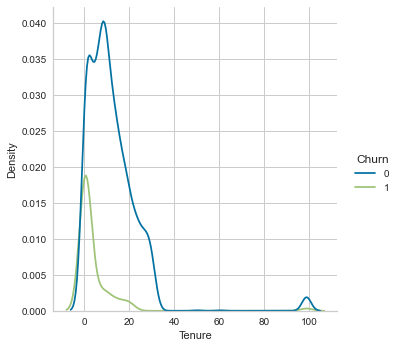

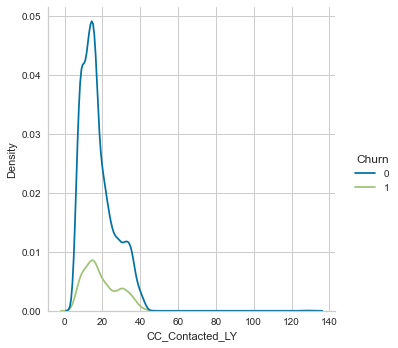

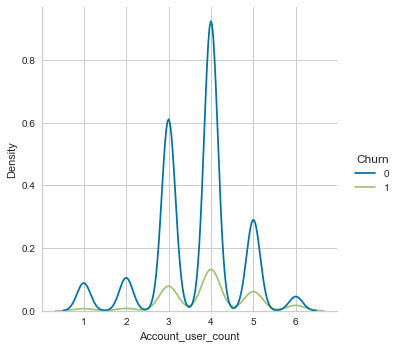

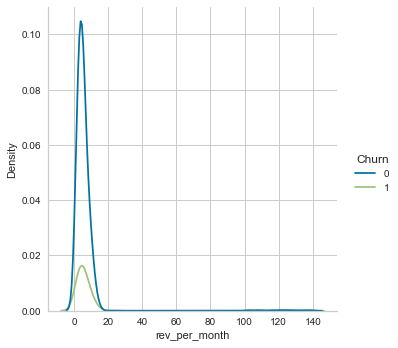

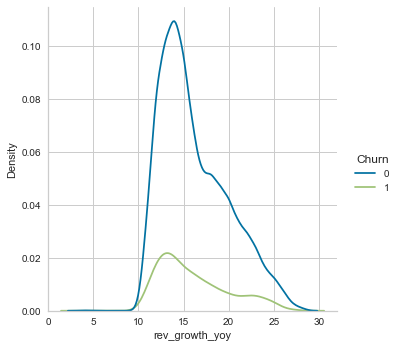

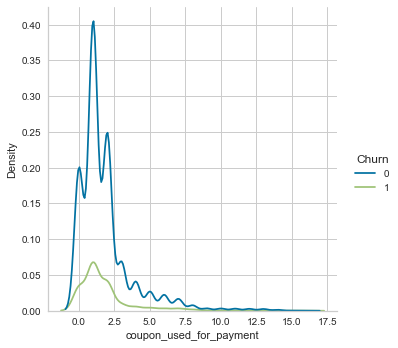

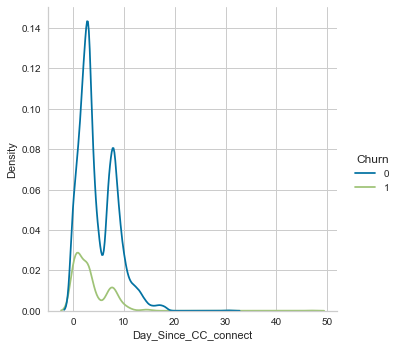

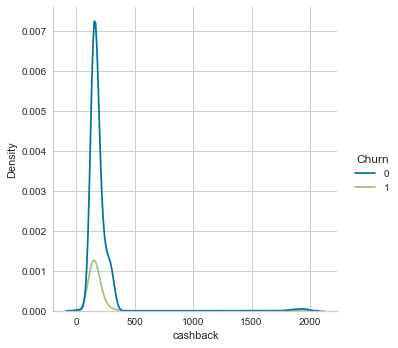

In [104]:
# fig, ax = plt.subplots(3,3, figsize = (12, 8))
# ax = ax.flatten()
sns.displot(data=df2,x='Tenure',hue='Churn', kind='kde', color='g');
sns.displot(data=df2,x='CC_Contacted_LY',hue='Churn', kind='kde', color='g');
sns.displot(data=df2,x='Account_user_count',hue='Churn', kind='kde', color='g');
sns.displot(data=df2,x='rev_per_month',hue='Churn', kind='kde', color='g');
sns.displot(data=df2,x='rev_growth_yoy',hue='Churn', kind='kde', color='g');
sns.displot(data=df2,x='coupon_used_for_payment',hue='Churn', kind='kde', color='g');
sns.displot(data=df2,x='Day_Since_CC_connect',hue='Churn', kind='kde', color='g');
sns.displot(data=df2,x='cashback',hue='Churn', kind='kde', color='g');


In [231]:

# np.isfinite(df_log).sum()
# dfb=df_log.copy()
# for i in dfb.columns:
#     dfb[i]=dfb[i].replace(-np.inf,0)
# np.isfinite(dfb).sum()

<AxesSubplot:>

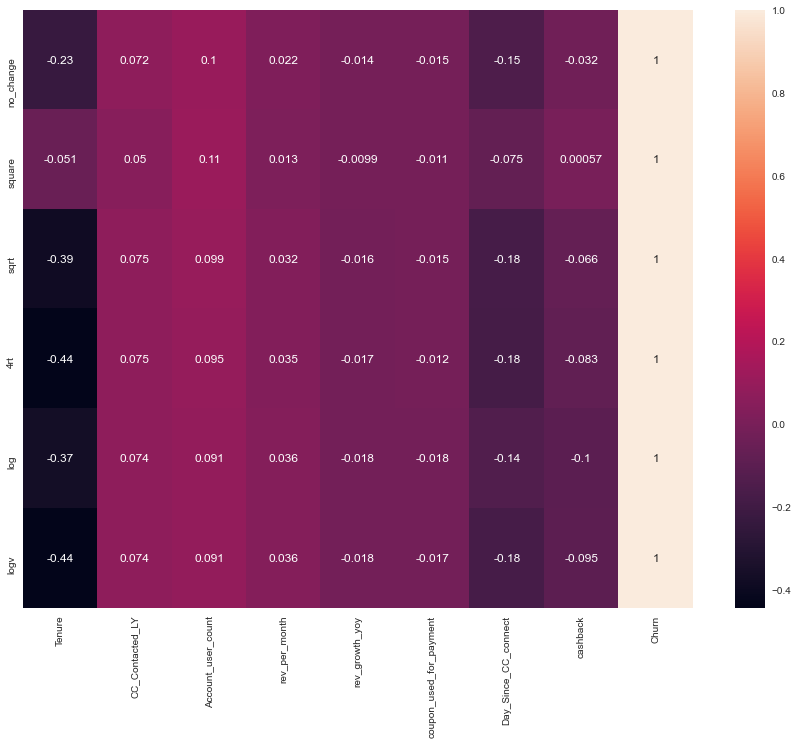

In [157]:
num[1:]
df_sq=pd.DataFrame(df_hm['Churn'])
df_sqrt=pd.DataFrame(df_hm['Churn'])
df_log=pd.DataFrame(df_hm['Churn'])
df_logv=pd.DataFrame(df_hm['Churn'])
df_4rt=pd.DataFrame(df_hm['Churn'])
df_tr=df_hm[col_h].copy()
df_cr=pd.DataFrame()
for j in col_h[0:-1]:
    df_log[j]=np.log(df_tr[j])
    df_logv[j]=np.log(df_tr[j])
    df_logv[j]=df_logv[j].replace(-np.inf,0)
    df_sq[j]=np.square((df_tr[j]))
    df_sqrt[j]=np.sqrt((df_tr[j]))
    df_4rt[j]=np.power((df_tr[j]),0.25)
    
df_cr['no_change']=df_tr.corr()['Churn']
df_cr['square']=df_sq.corr()['Churn']
df_cr['sqrt']=df_sqrt.corr()['Churn']
df_cr['4rt']=df_4rt.corr()['Churn']
df_cr['log']=df_log.corr()['Churn']
df_cr['logv']=df_logv.corr()['Churn']
df_cr.T        
plt.figure(figsize=(15,11))   
sns.heatmap(df_cr.T  ,annot=True,)

In [ ]:
Tenure,Day_Since_CC_connect : 4rt
'rev_per_month','rev_growth_yoy','coupon_used_for_payment','cashback' :log

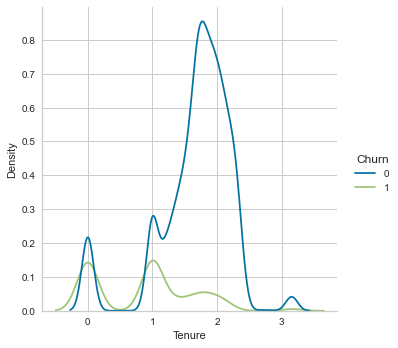

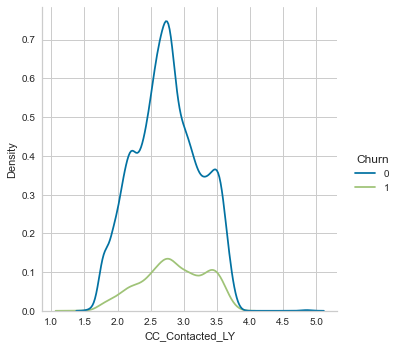

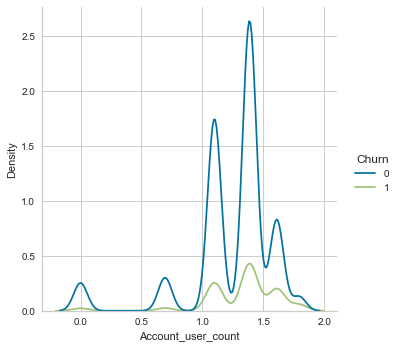

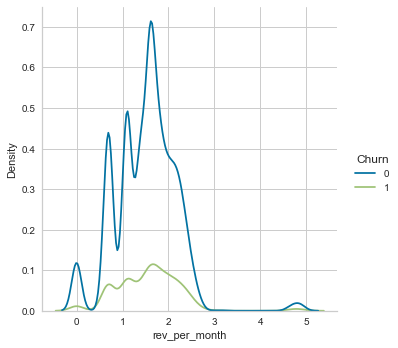

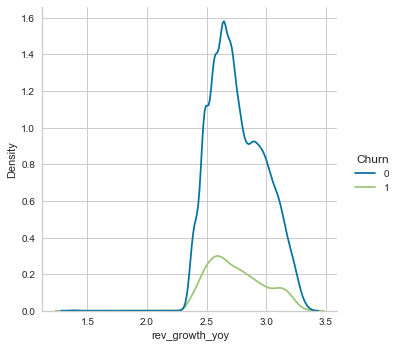

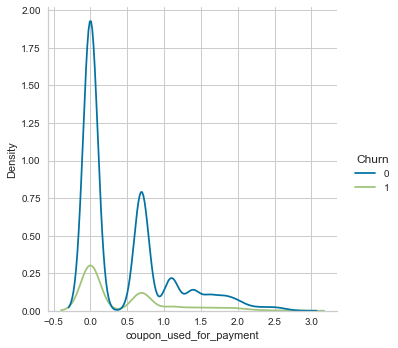

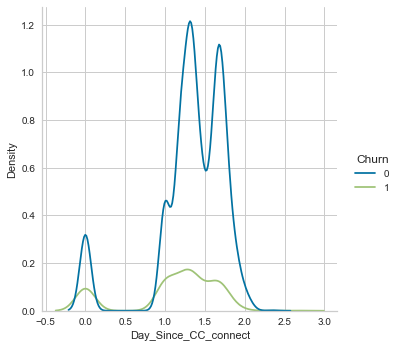

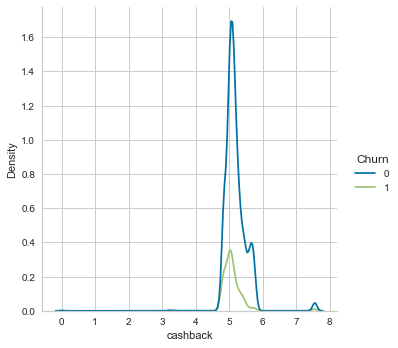

In [158]:
sns.displot(data=df_4rt,x='Tenure',hue='Churn', kind='kde', color='g');
sns.displot(data=df_logv,x='CC_Contacted_LY',hue='Churn', kind='kde', color='g');
sns.displot(data=df_logv,x='Account_user_count',hue='Churn', kind='kde', color='g');
sns.displot(data=df_logv,x='rev_per_month',hue='Churn', kind='kde', color='g');
sns.displot(data=df_logv,x='rev_growth_yoy',hue='Churn', kind='kde', color='g');
sns.displot(data=df_logv,x='coupon_used_for_payment',hue='Churn', kind='kde', color='g');
sns.displot(data=df_4rt,x='Day_Since_CC_connect',hue='Churn', kind='kde', color='g');
sns.displot(data=df_logv,x='cashback',hue='Churn', kind='kde', color='g');


In [148]:
df_cr

,no_change,square,sqrt,4rt,log
Tenure,-0.230692,-0.051422,-0.385681,-0.442148,-0.366509
CC_Contacted_LY,0.071676,0.049593,0.074552,0.074787,0.074373
Account_user_count,0.104534,0.110847,0.098911,0.095341,0.091286
rev_per_month,0.022125,0.013482,0.032042,0.035239,0.035791
rev_growth_yoy,-0.013838,-0.009908,-0.015858,-0.016871,-0.017882
coupon_used_for_payment,-0.014777,-0.011074,-0.015011,-0.012371,-0.017800
Day_Since_CC_connect,-0.145413,-0.075129,-0.176377,-0.181964,-0.138012
cashback,-0.031863,0.000572,-0.066398,-0.082993,-0.100534
Churn,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

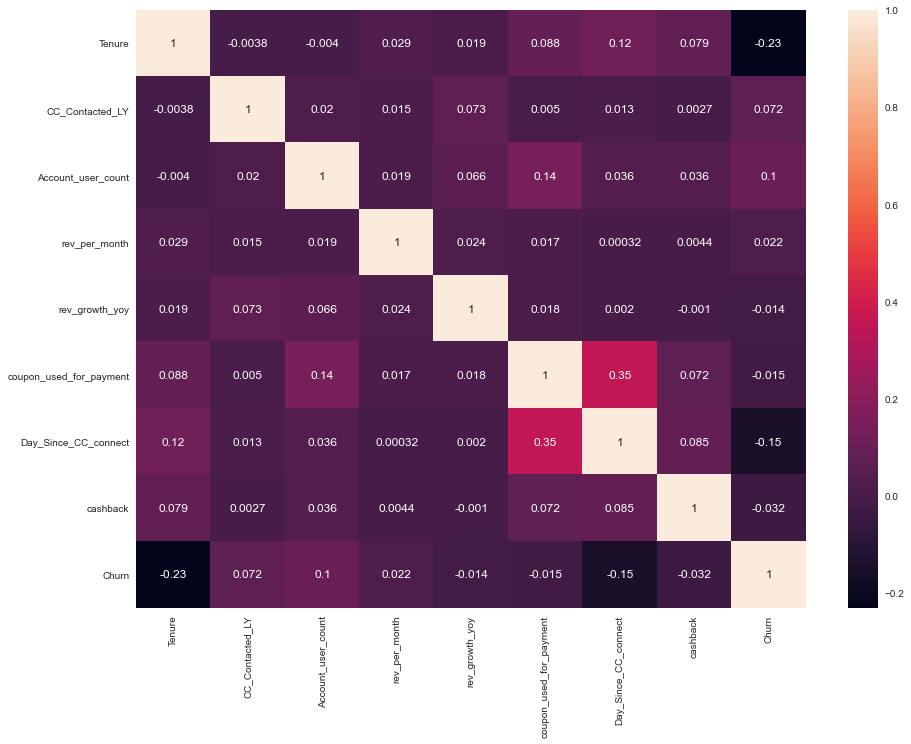

In [56]:
plt.figure(figsize=(15,11))
col_h=num[1:].copy()
col_h.append('Churn')
sns.heatmap(df_hm[col_h].corr(),annot=True,)

### Binning

In [196]:
def binning(data,n,col,Target):
    
    l=list(range(0,n))
    df_b=pd.DataFrame(data[col])
    df_b[Target]=data[Target]
    df_cr0=pd.DataFrame()
#     col.remove(Target)
    for m in col:
        df_b[m]=pd.qcut(data[m],q=n,labels=l)
        df_b[m]=pd.to_numeric(df_b[m])
    df_cr0['no_change']=df_b.corr()[Target]
    return df_b[m],df_cr0

In [216]:
def binning_mean(data,n,col,Target):
    
    l=list(range(0,n))
    df_b=pd.DataFrame(data[col])
    df_b[Target]=data[Target]
    df_cr0=pd.DataFrame()
#     col.remove(Target)
    for m in col:
        p=str(m)+'0'
        df_b[p]=pd.qcut(data[m],q=n,labels=l)
        mp=dict(df_b.groupby(by=p)[m].mean())
        df_b[m]=df_b[m].replace(mp)
        df_b.drop(p,axis=1,inplace=True)
        df_b[m]=pd.to_numeric(df_b[m])
    df_cr0['no_change']=df_b.corr()[Target]
    return df_b[m],df_cr0

In [110]:
for i in  col_h:
    print(i,'\t',df_hm[i].nunique())

Tenure 	 37
CC_Contacted_LY 	 44
Account_user_count 	 6
rev_per_month 	 58
rev_growth_yoy 	 19
coupon_used_for_payment 	 17
Day_Since_CC_connect 	 23
cashback 	 5692


#### Binning using simple labels

In [190]:
cr=pd.DataFrame()
data=df_hm.copy()
col_h=num[1:].copy()
col_h.append('Churn')
# col_h.remove('Account_user_count')
col=['cashback','CC_Contacted_LY','rev_per_month','Tenure']
Target='Churn'
cr={}
for n in [3,4,5,6,7]:
    data=df_hm.copy()
    dfmm,cr[n]=binning(data,n,col,Target)
for n in [8,10,15]:
    data=df_hm.copy()
    dfmm,cr[n]=binning(data,n,col=['cashback','CC_Contacted_LY'],Target='Churn')
cr[0]=df_hm.corr()['Churn'][['cashback','CC_Contacted_LY','rev_per_month','Tenure','Churn']]
# sns.heatmap
# pd.DataFrame(cr)
cro=pd.DataFrame()
# for i in [3,4,5,6,7]:
#     cro[i]=cr[i]
cro=pd.concat([cr[0]],axis=1)
for i in [3,4,5,6,7,8,10,15]:
    mp=pd.DataFrame(cr[i])
    mp.rename(columns={'no_change':str(i)+'_bins'},inplace=True)
#     mp[i]=mp['no_change']
    cro=pd.concat([cro,mp],axis=1)
cro.rename(columns={'Churn':'no_change'},inplace=True)
cro.T

,cashback,CC_Contacted_LY,rev_per_month,Tenure,Churn
no_change,-0.031863,0.071676,0.022125,-0.230692,1.0
3_bins,-0.141696,0.073581,0.037024,-0.346558,1.0
4_bins,-0.141094,0.075583,0.032745,-0.382969,1.0
5_bins,-0.155709,0.076629,0.030451,-0.400682,1.0
6_bins,-0.156236,0.078619,0.038807,-0.391670,1.0
7_bins,-0.161354,0.077997,0.033964,-0.408969,1.0
8_bins,-0.158321,0.076779,NaN,NaN,1.0
10_bins,-0.162021,0.075526,NaN,NaN,1.0
15_bins,-0.160100,0.075987,NaN,NaN,1.0


##### Inference :
    The most optimum bins based on correlation are
    •	'cashback' has optimum of10 bins
    •	'CC_Contacted_LY','rev_per_month'  have optimum of 6 bins


#### Binning using means

In [217]:
cri=pd.DataFrame()
data=df_hm.copy()
col_h=num[1:].copy()
col_h.append('Churn')
# col_h.remove('Account_user_count')
col=['cashback','CC_Contacted_LY','rev_per_month','Tenure']
Target='Churn'
cri={}
for n in [3,4,5,6,7]:
    data=df_hm.copy()
    dfmm,cri[n]=binning_mean(data,n,col,Target)
for n in [8,10,15]:
    data=df_hm.copy()
    dfmm,cri[n]=binning_mean(data,n,col=['cashback','CC_Contacted_LY'],Target='Churn')
cri[0]=df_hm.corr()['Churn'][['cashback','CC_Contacted_LY','rev_per_month','Tenure','Churn']]
# sns.heatmap
# pd.DataFrame(cri)
crio=pd.DataFrame()
# for i in [3,4,5,6,7]:
#     crio[i]=cri[i]
crio=pd.concat([cri[0]],axis=1)
for i in [3,4,5,6,7,8,10,15]:
    mp=pd.DataFrame(cri[i])
    mp.rename(columns={'no_change':str(i)+'_bins'},inplace=True)
#     mp[i]=mp['no_change']
    crio=pd.concat([crio,mp],axis=1)
crio.rename(columns={'Churn':'no_change'},inplace=True)
crio.T

,cashback,CC_Contacted_LY,rev_per_month,Tenure,Churn
no_change,-0.031863,0.071676,0.022125,-0.230692,1.0
3_bins,-0.032060,0.071676,0.021079,-0.167470,1.0
4_bins,-0.032104,0.071676,0.022193,-0.204193,1.0
5_bins,-0.032148,0.072309,0.011831,-0.226160,1.0
6_bins,-0.032192,0.071830,0.009050,-0.239196,1.0
7_bins,-0.032148,0.061915,0.018256,-0.254074,1.0
8_bins,-0.032138,0.055016,NaN,NaN,1.0
10_bins,-0.032128,0.033881,NaN,NaN,1.0
15_bins,-0.032174,0.029485,NaN,NaN,1.0


##### Inference:
    Binning using means has low correlation compared to normal binning and default data


#### Binning on transformed Data

In [180]:
rt=['Tenure','Day_Since_CC_connect']
log=['rev_per_month','rev_growth_yoy','coupon_used_for_payment','cashback']
df_tr1=df_hm.copy()
for i in log:
    df_tr1[i]=np.log(df_tr1[i])
    df_tr1[i]=df_tr1[i].replace(-np.inf,0)
for i in rt:
    df_tr1[i]=np.power(df_tr1[i],0.25)

In [192]:
cr=pd.DataFrame()
data=df_tr1.copy()
col_h=num[1:].copy()
col_h.append('Churn')
# col_h.remove('Account_user_count')
col=['cashback','CC_Contacted_LY','rev_per_month','Tenure']
Target='Churn'
cr={}
for n in [3,4,5,6,7]:
    data=df_tr1.copy()
    dfmm,cr[n]=binning(data,n,col,Target)
for n in [8,10,15]:
    data=df_tr1.copy()
    dfmm,cr[n]=binning(data,n,col=['cashback','CC_Contacted_LY'],Target='Churn')
cr[0]=df_tr1.corr()['Churn'][['cashback','CC_Contacted_LY','rev_per_month','Tenure','Churn']]
cr[50]=df_hm.corr()['Churn'][['cashback','CC_Contacted_LY','rev_per_month','Tenure','Churn']]
# sns.heatmap
# pd.DataFrame(cr)
cro1=pd.DataFrame()
# for i in [3,4,5,6,7]:
#     cro1[i]=cr[i]
cro1=pd.concat([cr[50]],axis=1)
cro1.rename(columns={'Churn':'no_change'},inplace=True)
cro1=pd.concat([cro1,cr[0]],axis=1)
cro1.rename(columns={'Churn':'np_transf'},inplace=True)
for i in [3,4,5,6,7,8,10,15]:
    mp=pd.DataFrame(cr[i])
    mp.rename(columns={'no_change':str(i)+'_bins_tr'},inplace=True)
#     mp[i]=mp['no_change']
    cro1=pd.concat([cro1,mp],axis=1)
cro1.rename(columns={'Churn':'no_change'},inplace=True)
cro1

,no_change,np_transf,3_bins_tr,4_bins_tr,5_bins_tr,6_bins_tr,7_bins_tr,8_bins_tr,10_bins_tr,15_bins_tr
cashback,-0.031863,-0.094545,-0.141696,-0.141094,-0.155709,-0.156236,-0.161354,-0.158321,-0.162021,-0.160100
CC_Contacted_LY,0.071676,0.071676,0.073581,0.075583,0.076629,0.078619,0.077997,0.076779,0.075526,0.075987
rev_per_month,0.022125,0.035791,0.037024,0.032745,0.030451,0.038807,0.033964,NaN,NaN,NaN
Tenure,-0.230692,-0.442148,-0.346558,-0.382969,-0.400682,-0.391670,-0.408969,NaN,NaN,NaN
Churn,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [191]:
croo=pd.concat([cro1,cro],axis=1)
croo.T

,cashback,CC_Contacted_LY,rev_per_month,Tenure,Churn
no_change,-0.031863,0.071676,0.022125,-0.230692,1.0
np_transf,-0.094545,0.071676,0.035791,-0.442148,1.0
3_bins_tr,-0.141696,0.073581,0.037024,-0.346558,1.0
4_bins_tr,-0.141094,0.075583,0.032745,-0.382969,1.0
5_bins_tr,-0.155709,0.076629,0.030451,-0.400682,1.0
6_bins_tr,-0.156236,0.078619,0.038807,-0.391670,1.0
7_bins_tr,-0.161354,0.077997,0.033964,-0.408969,1.0
8_bins_tr,-0.158321,0.076779,NaN,NaN,1.0
10_bins_tr,-0.162021,0.075526,NaN,NaN,1.0
15_bins_tr,-0.160100,0.075987,NaN,NaN,1.0


'cashback' :10 bins,10 bins_tr
['CC_Contacted_LY','rev_per_month']: 6 bins,6 bins_tr

##### Inference :
        The most optimum bins based on correlation are
    •	'cashback' has optimum of 10 bins
    •	'CC_Contacted_LY','rev_per_month'  have optimum of 6 bins
    Which is the same without transformation i.e , non linear  transformation doesn’t have any effect on bins


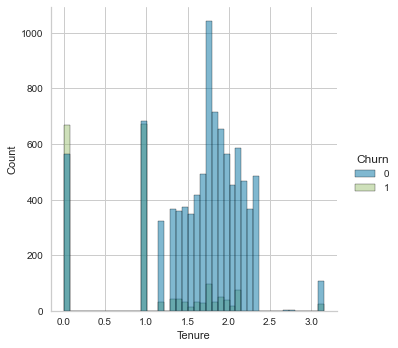

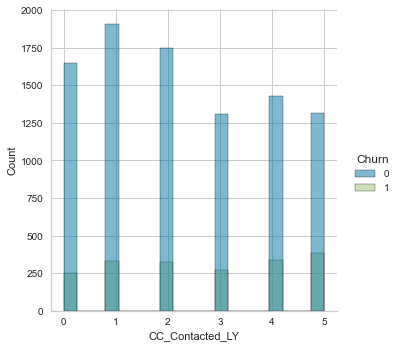

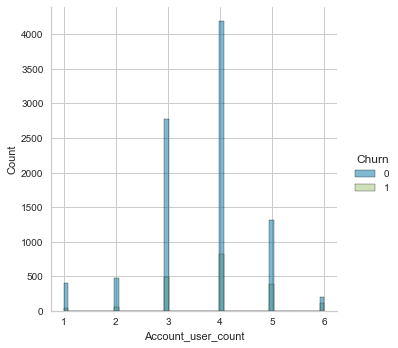

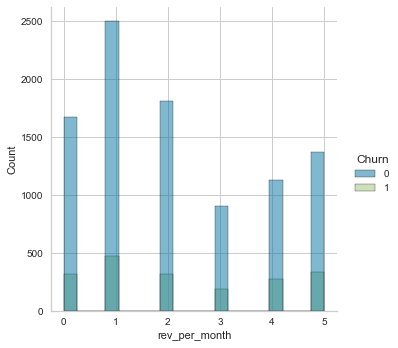

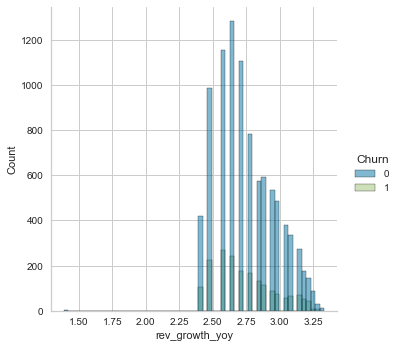

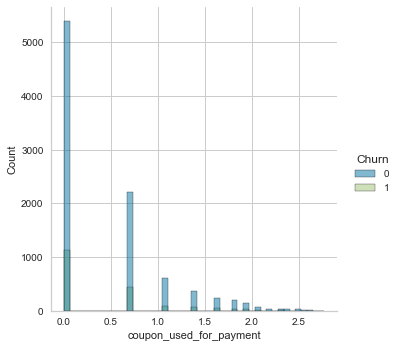

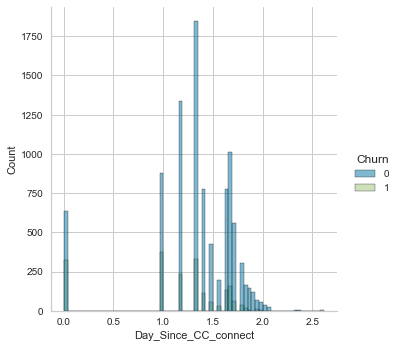

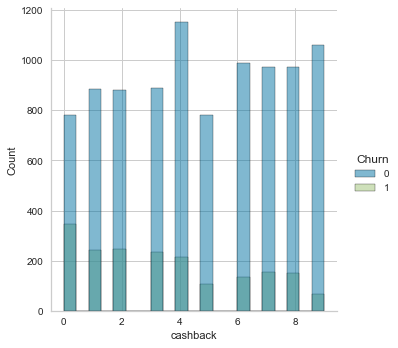

In [226]:
df_tr2=df_tr1.copy()
n=6
data=df_tr2
Target='Churn'
l=list(range(0,6))
df_tr2['CC_Contacted_LY']=pd.qcut(df_tr2['CC_Contacted_LY'],q=6,labels=l)
df_tr2['CC_Contacted_LY']=pd.to_numeric(df_tr2['CC_Contacted_LY'])
df_tr2['rev_per_month']=pd.qcut(df_tr2['rev_per_month'],q=6,labels=l)
df_tr2['rev_per_month']=pd.to_numeric(df_tr2['rev_per_month'])
# for col in ['CC_Contacted_LY','rev_per_month']:
#     df_tr2[m]=pd.qcut(df_tr2[m],q=6,labels=l)
# #     df_tr2[m],cc=binning(data,n,col,Target)
df_tr2['cashback']=pd.qcut(df_tr2['cashback'],q=10,labels=list(range(0,10)))
df_tr2['cashback']=pd.to_numeric(df_tr2['cashback'])
sns.displot(data=df_tr2,x='Tenure',hue='Churn', color='g');
sns.displot(data=df_tr2,x='CC_Contacted_LY',hue='Churn', color='g');
sns.displot(data=df_tr2,x='Account_user_count',hue='Churn', color='g');
sns.displot(data=df_tr2,x='rev_per_month',hue='Churn', color='g');
sns.displot(data=df_tr2,x='rev_growth_yoy',hue='Churn', color='g');
sns.displot(data=df_tr2,x='coupon_used_for_payment',hue='Churn', color='g');
sns.displot(data=df_tr2,x='Day_Since_CC_connect',hue='Churn', color='g');
sns.displot(data=df_tr2,x='cashback',hue='Churn', color='g');


In [227]:
df_tr2.to_excel('df_transf.xlsx')

<AxesSubplot:>

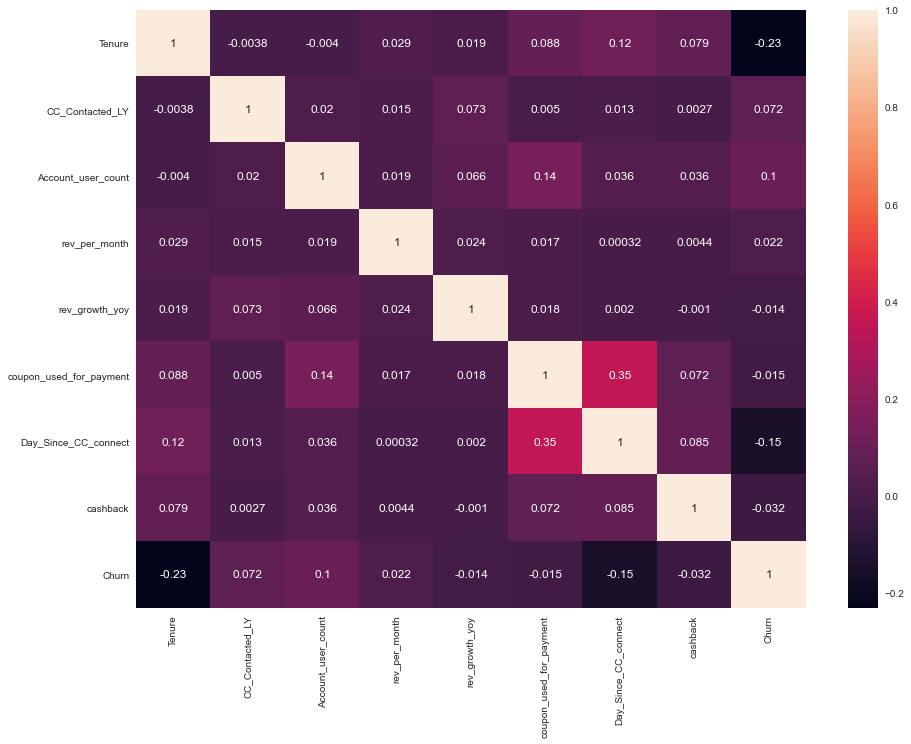

In [205]:

plt.figure(figsize=(15,11))
sns.heatmap(df_hm[col_h].corr()  ,annot=True)

<AxesSubplot:>

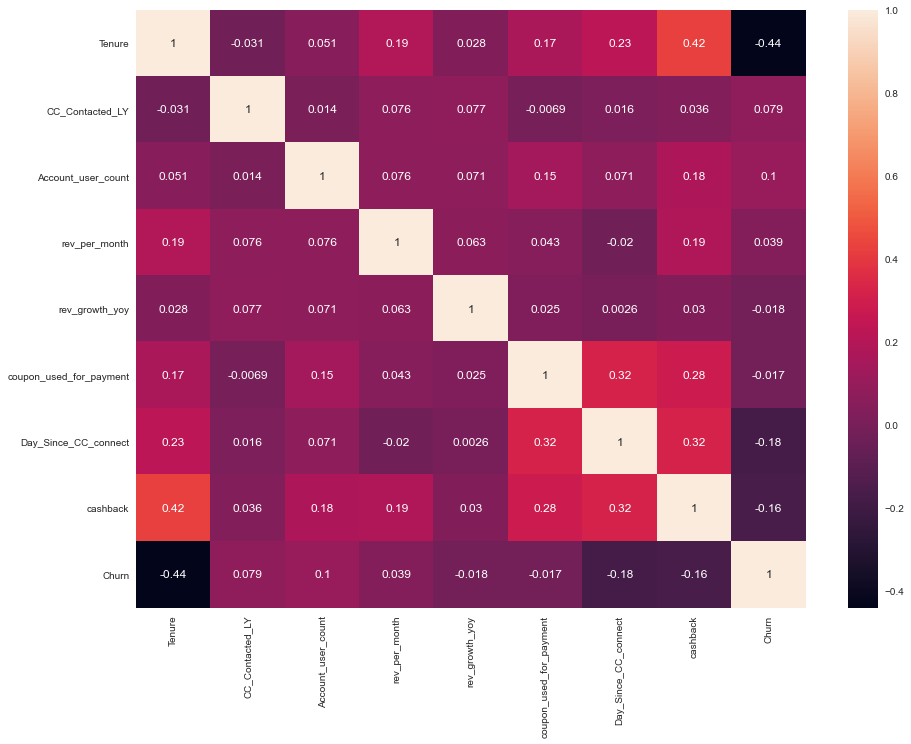

In [225]:
plt.figure(figsize=(15,11))
sns.heatmap(df_tr2[col_h].corr()  ,annot=True,)

##### Inference :
	We observe high difference in correlations of 
    •	Tenure (-0.23 to -0.44)
    •	Cashback(-0.032 to -0.16)
    •	Day_Since_CC_Connect(-0.15 to -0.18)


['Churn', 'City_Tier', 'Service_Score', 'CC_Agent_Score', 'Complain_ly']


<AxesSubplot:>

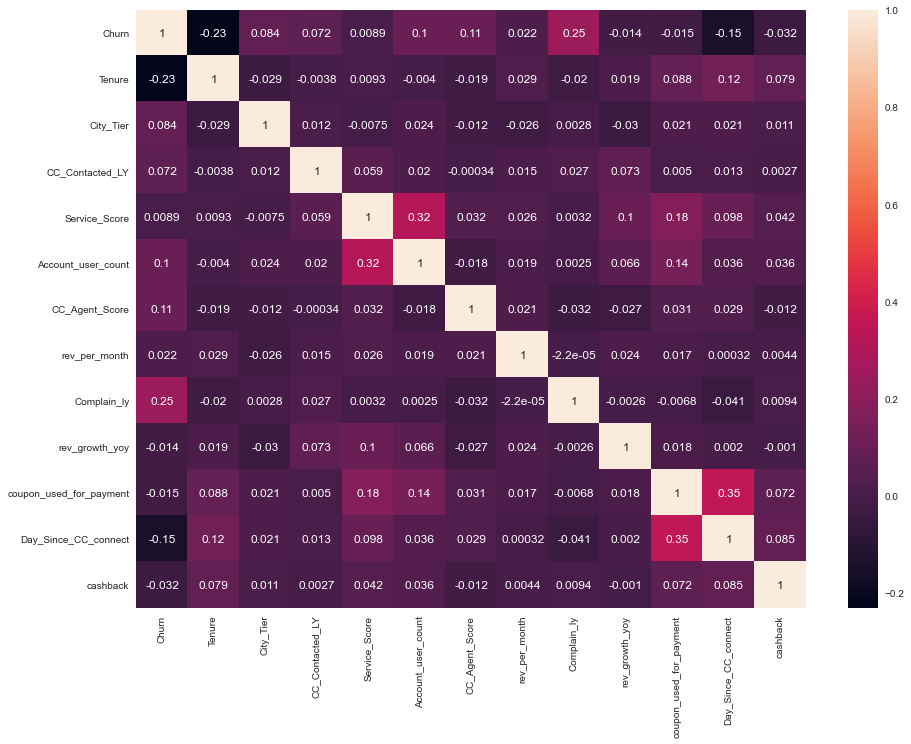

In [51]:
plt.figure(figsize=(15,11))
df_hm=df2.copy()
num,cat,cat_str=seperate_datatype(df2)
cat_num=cat
for i in cat_str:
    cat_num.remove(i)
for i in cat_num:
    df_hm[i]=pd.to_numeric(df_hm[i])
print(cat_num)
df_hm.drop('AccountID',axis=1,inplace=True)
sns.heatmap(df_hm.corr(),annot=True,)

### RFM analysis

### RFM

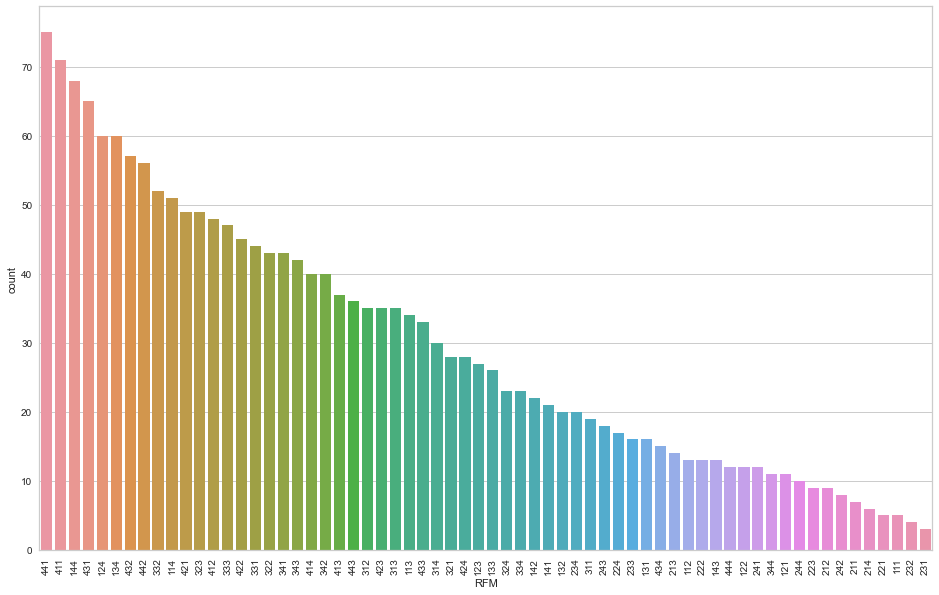

In [59]:
df_temp=df2.groupby('Churn').get_group(1).copy()
rfm=pd.DataFrame(index=df_temp.index)
rfm['Recency']=df_temp['Day_Since_CC_connect']
rfm['Frequency']=df_temp['CC_Contacted_LY']
# rfm['Monetary']=df_temp['rev_per_month']
rfm['Monetary']=df_temp['cashback']
# rfm['Churn']=df_temp['Churn']
bin_lab=['1','2','3','4']
div=[0,0.25,0.50,0.75,1]
rfm['Recency_bin']=pd.qcut(rfm['Recency'],q=div,labels=bin_lab[::-1])
rfm['Monetary_bin']=pd.qcut(rfm['Monetary'],q=div,labels=bin_lab)
rfm['Frequency_bin']=pd.qcut(rfm['Frequency'],q=div,labels=bin_lab[::-1])
rfm['RFM']=rfm['Recency_bin'].astype(str)+rfm['Frequency_bin'].astype(str)+rfm['Monetary_bin'].astype(str)
# rfm0=rfm.groupby('Churn').get_group(0)
# rfm1=rfm.groupby('Churn').get_group(1)
# plt.figure(figsize=(16,10))
# plt.xticks(rotation=90)
# sns.countplot(rfm0['RFM'],order = rfm0['RFM'].value_counts().index)
# plt.show()
plt.figure(figsize=(16,10))
plt.xticks(rotation=90)
sns.countplot(rfm['RFM'],order = rfm['RFM'].value_counts().index)
plt.show()

In [60]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1896 entries, 0 to 11251
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Recency        1896 non-null   float64 
 1   Frequency      1896 non-null   float64 
 2   Monetary       1896 non-null   float64 
 3   Recency_bin    1896 non-null   category
 4   Monetary_bin   1896 non-null   category
 5   Frequency_bin  1896 non-null   category
 6   RFM            1896 non-null   object  
dtypes: category(3), float64(3), object(1)
memory usage: 160.2+ KB


In [84]:
p=pd.pivot_table(data=rfm,values='RFM',columns=['Monetary_bin'],
                 index=['Recency_bin','Frequency_bin'],aggfunc='count',fill_value=0)
m=p.T.sort_index(ascending=False)
m.T

Monetary_bin                4   3   2   1
Recency_bin Frequency_bin                
4           4              12  36  56  75
            3              15  33  57  65
            2              28  35  45  49
            1              40  37  48  71
3           4              11  42  40  43
            3              23  47  52  44
            2              23  49  43  28
            1              30  35  35  19
2           4              10  18   8  12
            3              20  16   4   3
            2              17   9  13   5
            1               6  14   9   7
1           4              68  13  22  21
            3              60  26  20  16
            2              60  27  12  11
            1              51  34  13   5

In [78]:
df_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   AccountID                11260 non-null  int64   
 1   Churn                    11260 non-null  category
 2   Tenure                   11260 non-null  float64 
 3   City_Tier                11260 non-null  category
 4   CC_Contacted_LY          11260 non-null  float64 
 5   Payment                  11260 non-null  category
 6   Gender                   11260 non-null  category
 7   Service_Score            11260 non-null  category
 8   Account_user_count       11260 non-null  float64 
 9   account_segment          11260 non-null  category
 10  CC_Agent_Score           11260 non-null  category
 11  Marital_Status           11260 non-null  category
 12  rev_per_month            11260 non-null  float64 
 13  Complain_ly              11260 non-null  category
 14  rev_gr

### Data encoding

In [110]:
target='Churn'
num,cat,cat_str=seperate_datatype(df2)
df_tmp=df_out.copy()
## One heat encoding for 'Payment', 'account_segment', 'Marital_Status', 'Login_device'
cat_oh=cat_str
cat_oh.remove('Gender')
df_tmp1=pd.get_dummies(df_tmp,columns=cat_oh)
## Binary encoding for gender
df_tmp1['Gender']=df_tmp1['Gender'].replace({'F':1,'M':0})
df_tf=df_tmp1.copy()
df_tf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   AccountID                     11260 non-null  int64   
 1   Churn                         11260 non-null  category
 2   Tenure                        11260 non-null  float64 
 3   City_Tier                     11260 non-null  category
 4   CC_Contacted_LY               11260 non-null  float64 
 5   Gender                        11260 non-null  int64   
 6   Service_Score                 11260 non-null  category
 7   Account_user_count            11260 non-null  float64 
 8   CC_Agent_Score                11260 non-null  category
 9   rev_per_month                 11260 non-null  float64 
 10  Complain_ly                   11260 non-null  category
 11  rev_growth_yoy                11260 non-null  float64 
 12  coupon_used_for_payment       11260 non-null  

<AxesSubplot:>

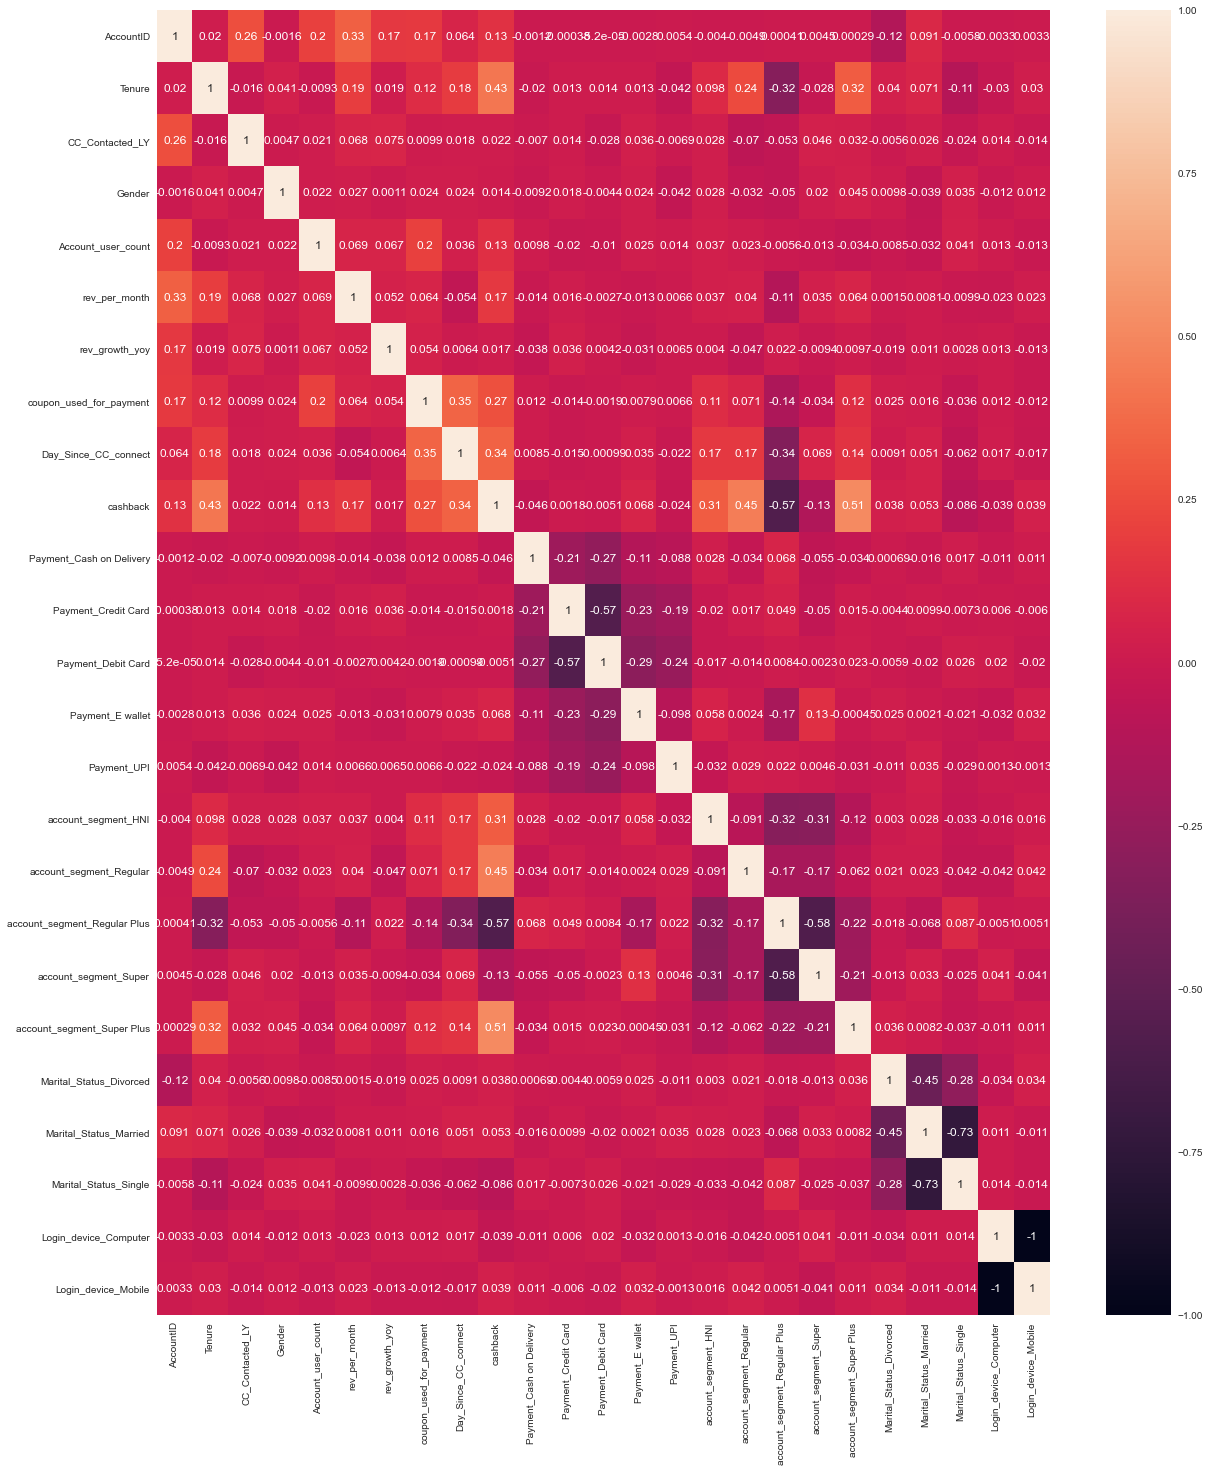

In [157]:
plt.figure(figsize=(20,24))
sns.heatmap(df_tf.corr(),annot=True)

## Unbalanced Data

## SMOTE

In [122]:
target='Churn'
num,cat,cat_str=seperate_datatype(df2)
df_tmp=df_tf.copy()
X=df_tmp.drop([target],axis=1)
Y=df_tmp[target]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1,stratify=Y)
print('Train ')
print(y_train.value_counts(normalize=True))
print('Train Shape',y_train.shape)
# print('Test \n',y_test.value_counts(normalize=True))
# print('Test Shape',x_test.shape)
Default_train = pd.concat([x_train, y_train], axis = 1)
Default_test = pd.concat([x_test, y_test], axis = 1)
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=33)
x_res, y_res = sm.fit_resample(x_train, y_train)
Default_train_smote = pd.concat([x_res, y_res], axis = 1)
print('On applying SMOTE')
print(y_res.value_counts(normalize=True))
print('SMOTE Shape:',y_res.shape)

Train 
0    0.831642
1    0.168358
Name: Churn, dtype: float64
Train Shape (7882,)
On applying SMOTE
1    0.5
0    0.5
Name: Churn, dtype: float64
SMOTE Shape: (13110,)


## Clustering

### Kmeans 

In [211]:
df_tf

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Gender,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,...,account_segment_HNI,account_segment_Regular,account_segment_Regular Plus,account_segment_Super,account_segment_Super Plus,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Login_device_Computer,Login_device_Mobile
0,20000,1,4.0,3.0,6.0,1,3.0,3.0,2.0,9.0,...,0,0,0,1,0,0,0,1,0,1
1,20001,1,0.0,1.0,8.0,0,3.0,4.0,3.0,7.0,...,0,0,1,0,0,0,0,1,0,1
2,20002,1,0.0,1.0,30.0,0,2.0,4.0,3.0,6.0,...,0,0,1,0,0,0,0,1,0,1
3,20003,1,0.0,3.0,15.0,0,2.0,4.0,5.0,8.0,...,0,0,0,1,0,0,0,1,0,1
4,20004,1,0.0,1.0,12.0,0,2.0,3.0,5.0,3.0,...,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11255,31255,0,10.0,1.0,34.0,0,3.0,2.0,1.0,9.0,...,0,0,0,1,0,0,1,0,1,0
11256,31256,0,13.0,1.0,19.0,0,3.0,5.0,5.0,7.0,...,1,0,0,0,0,0,1,0,0,1
11257,31257,0,1.0,1.0,14.0,0,3.0,2.0,4.0,7.0,...,0,0,0,1,0,0,1,0,0,1
11258,31258,0,23.0,3.0,11.0,0,4.0,5.0,4.0,7.0,...,0,0,0,1,0,0,1,0,1,0


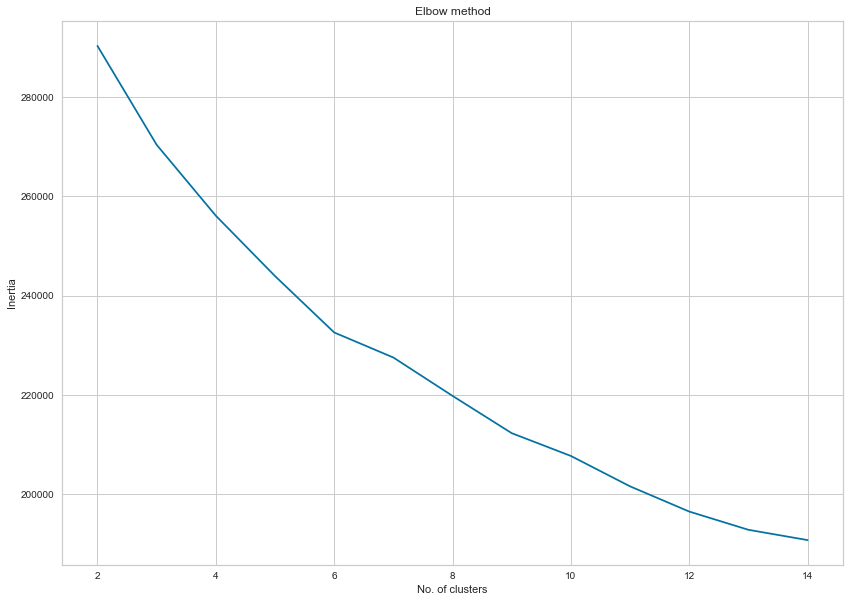

In [244]:
df_00cl0=df_tf.copy()
# df_00cl1=pd.get_dummies(df_00cl0,columns=cat,drop_first=True)
# col=df_00cl1.columns.tolist()[9:]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_0scaled= scaler.fit_transform(df_00cl0)
df_00cl3=pd.DataFrame(df_0scaled,columns=df_00cl0.columns.tolist())
# df_00cl3=pd.concat([df_00cl2,df_00cl1[col]],axis=1)
df_00cl3.drop('AccountID',axis=1,inplace=True)
data=df_00cl3.drop('Churn',axis=1)
wss00=[]
from sklearn.cluster import KMeans
for i in range(2,15):
    KM = KMeans(n_clusters=i,random_state=0)
    KM.fit(data)
    wss00.append(KM.inertia_)
plt.figure(figsize=(14,10))
plt.title('Elbow method')
plt.xlabel('No. of clusters')
plt.ylabel('Inertia')
plt.plot(range(2,15), wss00)


In [216]:
ws=pd.Series(wss00,index=range(2,15)).diff()
ws.sort_values()

3    -19909.645109
4    -14279.375779
5    -12156.123624
6    -11357.675251
8     -7723.278622
9     -7509.209801
11    -6119.924683
12    -5075.959413
7     -5045.373387
10    -4590.241399
13    -3673.614620
14    -2069.590110
2              NaN
dtype: float64

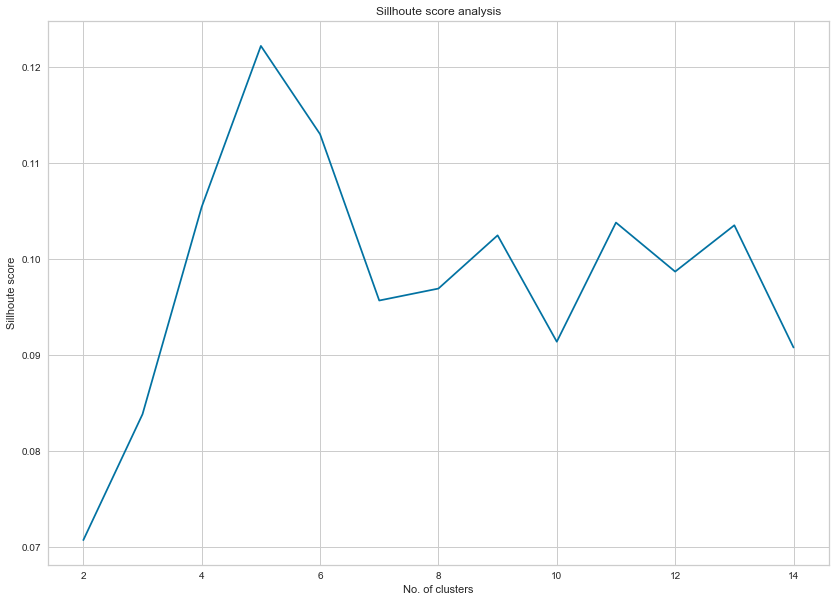

In [242]:
data=df_00cl3.drop('Churn',axis=1)
sill=[]
for i in range(2,15):
    KM = KMeans(n_clusters=i,random_state=0)
    KM.fit(data)
    sill.append(silhouette_score(data,KM.labels_))
#     labels_k_means = KM.labels_
# print(silhouette_score(data,KM.labels_))
# print(silhouette_samples(data,KM.labels_).min())
plt.figure(figsize=(14,10))
plt.title('Sillhoute score analysis')
plt.xlabel('No. of clusters')
plt.ylabel('Sillhoute score')
plt.plot(range(2,15), sill)

In [237]:
data=df_00cl3.drop('Churn',axis=1)
i=5
KM = KMeans(n_clusters=i,random_state=0)
KM.fit(data)
labels_k_means = KM.labels_

print('Sillhoute score',silhouette_score(data,KM.labels_))
print('Sillhoute min sample',silhouette_samples(data,KM.labels_).min())

Sillhoute score 0.12221591245702762
Sillhoute min sample -0.013968785441635996


In [221]:
df_00cl4=df_00cl3.copy()
df_00cl4.index=df2['AccountID']
df_00cl4['clusters']=labels_k_means
df_00cl4

,Churn,Tenure,City_Tier,CC_Contacted_LY,Gender,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,...,account_segment_Regular,account_segment_Regular Plus,account_segment_Super,account_segment_Super Plus,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Login_device_Computer,Login_device_Mobile,clusters
AccountID,,,,,,,,,,,,,,,,,,,,,
20000,2.222345,-0.703315,1.481914,-1.379652,1.237528,0.133748,-0.769057,-0.776488,1.302037,1.618461,...,-0.220039,-0.774377,1.331177,-0.279888,-0.417007,-1.081847,1.482857,-0.605123,0.605123,2
20001,2.222345,-1.153334,-0.709334,-1.146110,-0.808063,0.133748,0.312917,-0.047944,0.607469,1.618461,...,-0.220039,1.291361,-0.751215,-0.279888,-0.417007,-1.081847,1.482857,-0.605123,0.605123,3
20002,2.222345,-1.153334,-0.709334,1.422855,-0.808063,-1.250443,0.312917,-0.047944,0.260185,1.618461,...,-0.220039,1.291361,-0.751215,-0.279888,-0.417007,-1.081847,1.482857,-0.605123,0.605123,3
20003,2.222345,-1.153334,1.481914,-0.328712,-0.808063,-1.250443,0.312917,1.409143,0.954753,-0.617871,...,-0.220039,-0.774377,1.331177,-0.279888,-0.417007,-1.081847,1.482857,-0.605123,0.605123,2
20004,2.222345,-1.153334,-0.709334,-0.679025,-0.808063,-1.250443,-0.769057,1.409143,-0.781666,-0.617871,...,-0.220039,1.291361,-0.751215,-0.279888,-0.417007,-1.081847,1.482857,-0.605123,0.605123,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31255,-0.449975,-0.028286,-0.709334,1.889940,-0.808063,0.133748,-1.851031,-1.505031,1.302037,-0.617871,...,-0.220039,-0.774377,1.331177,-0.279888,-0.417007,0.924345,-0.674374,1.652558,-1.652558,2
31256,-0.449975,0.309228,-0.709334,0.138373,-0.808063,0.133748,1.394891,1.409143,0.607469,-0.617871,...,-0.220039,-0.774377,-0.751215,-0.279888,-0.417007,0.924345,-0.674374,-0.605123,0.605123,1
31257,-0.449975,-1.040829,-0.709334,-0.445483,-0.808063,0.133748,-1.851031,0.680599,0.607469,1.618461,...,-0.220039,-0.774377,1.331177,-0.279888,-0.417007,0.924345,-0.674374,-0.605123,0.605123,2


In [240]:
df_c=df_tf.copy()
df_c['clusters']=labels_k_means
round(df_c.groupby('clusters')[num[1:]].median().T,3)

clusters,0,1,2,3,4
Tenure,20.00,11.00,9.00,4.00,21.000
CC_Contacted_LY,14.00,16.00,16.00,15.00,16.000
Account_user_count,4.00,4.00,4.00,4.00,4.000
rev_per_month,5.00,5.00,5.00,4.00,5.000
rev_growth_yoy,15.00,15.00,15.00,15.00,15.000
coupon_used_for_payment,2.00,2.00,1.00,1.00,2.000
Day_Since_CC_connect,8.00,7.00,4.00,3.00,7.000
cashback,271.44,208.98,168.06,146.32,268.775


In [241]:
round(df_c.groupby('clusters')[num[1:]].mean().T,3)

clusters,0,1,2,3,4
Tenure,20.067,12.378,9.925,6.558,20.416
CC_Contacted_LY,15.083,18.403,18.338,17.228,18.801
Account_user_count,3.806,3.793,3.695,3.704,3.597
rev_per_month,5.773,5.513,5.387,4.826,5.908
rev_growth_yoy,15.390,16.225,16.146,16.299,16.323
coupon_used_for_payment,1.831,1.770,1.426,1.273,1.947
Day_Since_CC_connect,7.189,5.962,4.865,3.016,6.336
cashback,267.152,210.561,169.861,144.955,257.008


In [245]:
round(df_c.groupby('clusters')[num[1:]].std().T,3)

clusters,0,1,2,3,4
Tenure,6.492,8.327,7.959,7.737,7.357
CC_Contacted_LY,6.948,8.655,8.753,8.140,9.859
Account_user_count,0.869,0.860,0.938,0.934,0.948
rev_per_month,2.770,2.924,2.920,2.788,2.824
rev_growth_yoy,3.473,3.861,3.687,3.736,4.100
coupon_used_for_payment,1.189,1.243,1.082,0.947,1.260
Day_Since_CC_connect,4.308,3.708,3.228,2.571,4.313
cashback,20.925,24.379,21.697,21.085,25.674


In [257]:
# col=df_c.columns.to_list()[1:9]
df_c[num[1:]].describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,11260.0,10.251421,8.888905,0.00,2.00,9.00,16.00,37.00
CC_Contacted_LY,11260.0,17.815009,8.564140,4.00,11.00,16.00,23.00,41.00
Account_user_count,11260.0,3.710790,0.924278,1.50,3.00,4.00,4.00,5.50
rev_per_month,11260.0,5.250799,2.879616,1.00,3.00,5.00,7.00,13.00
rev_growth_yoy,11260.0,16.193073,3.757271,4.00,13.00,15.00,19.00,28.00
coupon_used_for_payment,11260.0,1.475311,1.102248,0.00,1.00,1.00,2.00,3.50
Day_Since_CC_connect,11260.0,4.546270,3.493493,0.00,2.00,3.00,7.00,14.50
cashback,11260.0,177.284260,43.573285,73.76,147.89,165.25,197.31,271.44


## Churn Distribution among clusters

In [265]:
fi=pd.DataFrame(df_c.groupby('clusters')['Churn'].value_counts())
fi['percent']=round(pd.DataFrame(df_c.groupby('clusters')['Churn'].value_counts(normalize=True))['Churn'],2)*100
fi

Churn  percent
clusters Churn                
0        0        480     92.0
         1         40      8.0
1        0       1386     84.0
         1        255     16.0
2        0       3646     90.0
         1        416     10.0
3        0       3074     73.0
         1       1145     27.0
4        0        778     95.0
         1         40      5.0

### Insights from Clusters

    3rd cluster has the highest number(1145) and percent(27%) of  Churners
    3rd cluster has the lowest cashback.
    3rd cluster has the lowest  rev_per_month
    3rd cluster has the lowest Day_Since_CC_Connect
    3rd cluster can be considered as a potential churner group with 0.27 probability of churning
    0 and 1st  group have lowest percent(8%,5%) of churners but have very low total count


###  KElbowVisualizer

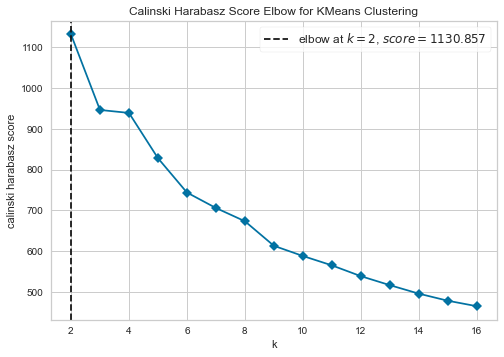

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [151]:
data=df_0cl3.drop('Churn_1',axis=1)
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,17), metric='calinski_harabasz', timings=False)

visualizer.fit(data)    # Fit the data to the visualizer
visualizer.poof() 

## Hierarchy

In [223]:
from scipy.cluster.hierarchy import dendrogram, linkage
mtd=['ward','average']
# data=
# for i in mtd:
#     wardlink = linkage(data, method = 'ward')
#     dend = dendrogram(wardlink,
#                  truncate_mode='lastp',
#                  p = 15,
#                  )

In [224]:
def hr_cluster(data,method,truncate,k):
    from scipy.cluster.hierarchy import dendrogram, linkage
    wardlink = linkage(data, method )
    dend = dendrogram(wardlink,
                 truncate_mode=truncate,
                 p=k )   
    return dend

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [45.0, 45.0, 55.0, 55.0],
  [75.0, 75.0, 85.0, 85.0],
  [95.0, 95.0, 105.0, 105.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [115.0, 115.0, 132.5, 132.5],
  [100.0, 100.0, 123.75, 123.75],
  [80.0, 80.0, 111.875, 111.875],
  [65.0, 65.0, 95.9375, 95.9375],
  [50.0, 50.0, 80.46875, 80.46875],
  [30.0, 30.0, 65.234375, 65.234375],
  [10.0, 10.0, 47.6171875, 47.6171875]],
 'dcoord': [[0.0, 155.97518540228052, 155.97518540228052, 0.0],
  [0.0, 69.62510811267154, 69.62510811267154, 0.0],
  [0.0, 149.76079251937844, 149.76079251937844, 0.0],
  [0.0, 81.68633130062888, 81.68633130062888, 0.0],
  [0.0, 82.77135874587701, 82.77135874587701, 0.0],
  [0.0, 72.73094263787115, 72.73094263787115, 0.0],
  [0.0, 92.18936882402298, 92.18936882402298, 72.73094263787115],
  [0.0, 118.41815665468285, 118.41815665468285, 92.18936882402298],
  [82.77135874587701,
   130.77174719782641,
   130.77174719782641,
   118.41

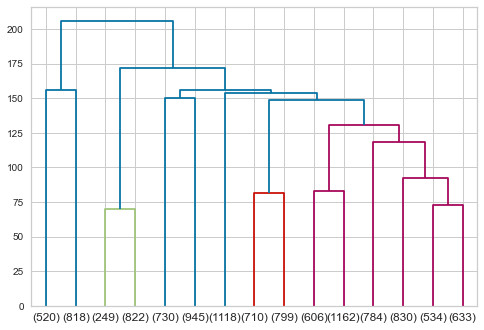

In [225]:
mtd=['ward','average']
data=df_00cl3.drop('Churn',axis=1)
method=mtd[0]
truncate='lastp'
k=15
hr_cluster(data,method,truncate,k)

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [35.0, 35.0, 52.5, 52.5],
  [85.0, 85.0, 95.0, 95.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [115.0, 115.0, 132.5, 132.5],
  [105.0, 105.0, 123.75, 123.75],
  [90.0, 90.0, 114.375, 114.375],
  [75.0, 75.0, 102.1875, 102.1875],
  [43.75, 43.75, 88.59375, 88.59375],
  [12.5, 12.5, 66.171875, 66.171875]],
 'dcoord': [[0.0, 7.12279185072916, 7.12279185072916, 0.0],
  [0.0, 7.249087755380161, 7.249087755380161, 7.12279185072916],
  [0.0, 7.175097668029366, 7.175097668029366, 0.0],
  [0.0, 7.279998548472102, 7.279998548472102, 7.175097668029366],
  [0.0, 7.4089140700893426, 7.4089140700893426, 7.279998548472102],
  [0.0, 7.100719719492787, 7.100719719492787, 0.0],
  [0.0, 7.226278152411377, 7.226278152411377, 0.0],
  [0.0, 7.241213248163626, 7.241213248163626, 7.226278152411377],
  [0.0, 7.505558301545029, 7.505558301545029, 7.241213248163626],


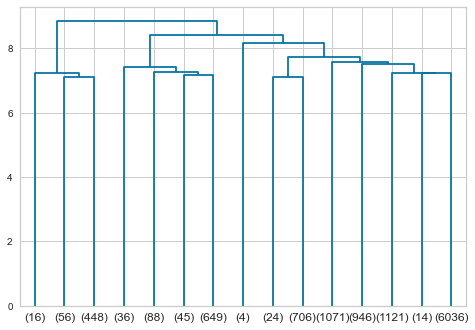

In [228]:
mtd=['ward','average']
data=df_00cl3.drop('Churn',axis=1)
method=mtd[1]
truncate='lastp'
k=15
dnd=hr_cluster(data,method,truncate,k)
dnd

In [229]:
mtd=['ward','average']
data=df_00cl3.drop('Churn',axis=1)
wardlink = linkage(data, method=mtd[0] )
from scipy.cluster.hierarchy import fcluster
clustersn = fcluster(wardlink, 3, criterion='maxclust')
print(silhouette_score(data,clustersn))
print(silhouette_samples(data,clustersn).min())

0.10222705178037518
-0.1299383644303068


In [233]:
mtd=['ward','average']
data=df_00cl3.drop('Churn',axis=1)
wardlink = linkage(data, method=mtd[0] )
from scipy.cluster.hierarchy import fcluster
clustersn = fcluster(wardlink, 5, criterion='maxclust')
print(silhouette_score(data,clustersn))
print(silhouette_samples(data,clustersn).min())

0.1207841284999924
-0.026990747201806792


### agglomerate clust

In [231]:
data=df_00cl3.drop('Churn',axis=1)
from sklearn.cluster import AgglomerativeClustering
clusters_agg = AgglomerativeClustering(n_clusters = 5).fit(data)
print(silhouette_score(data,clusters_agg.labels_))
print(silhouette_samples(data,clusters_agg.labels_).min())

0.1207841284999924
-0.026990747201806792


In [232]:
data=df_00cl3.drop('Churn',axis=1)
from sklearn.cluster import AgglomerativeClustering
clusters_agg = AgglomerativeClustering(n_clusters = 3).fit(data)
print(silhouette_score(data,clusters_agg.labels_))
print(silhouette_samples(data,clusters_agg.labels_).min())

0.10222705178037518
-0.1299383644303068


# Business Insights

    Tenure and Churn has a negative correlation of -0.23,i.e Tenure decreases with increase in  Churn so old customers have a low churn rate
    Highest number of customer care calls are recieved from  customers who didn't churn 
    90% of Unchurned customers user count are concentrated between 3, 4 and 5
    City Tier has almost no effect on churning
    Most of the married cutomers don't churn
    Churn and Complain_ly has a positive correlation of 0.25  ,i.e Churn increases with increase in  Complain_ly a positive trend .
    So, Unchurned Customers  have low number of complaints  last year
